In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [6]:
from ydata_profiling import ProfileReport

In [4]:
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


# Dataset Features Overview

## 1. CustomerID
**Definition**: A unique identifier for each customer.  
**Purpose**:  
- Distinguishes customers and ensures there are no duplicates.  
- Crucial for tracking individual customer behavior over time.

## 2. Age
**Definition**: The age of the customer.  
**Purpose**:  
- Helps segment customers into age groups.  
- Enables analysis of spending and service preferences by age.  
- Useful for tailoring marketing strategies and promotions.

## 3. Gender
**Definition**: The gender of the customer (e.g., Male, Female).  
**Purpose**:  
- Enables segmentation by gender to understand preferences.  
- Identifies trends, such as whether men or women spend more or use specific services.

## 4. Visit_Frequency
**Definition**: The number of visits a customer makes in a given period.  
**Purpose**:  
- Measures customer loyalty and engagement.  
- Identifies frequent vs. occasional customers.  
- Useful for tailoring loyalty program rewards or incentives.

## 5. Service_Type
**Definition**: The type of service the customer used (e.g., Haircut, Treatment, Hair Coloring).  
**Purpose**:  
- Provides insight into which services are most popular.  
- Allows effective allocation of resources based on demand.  
- Analyzes the relationship between service type and spending.

## 6. Average_Spend_Per_Visit
**Definition**: The average amount the customer spends per visit.  
**Purpose**:  
- Assesses customer spending behavior.  
- Identifies high-value customers.  
- Reveals spending trends by service type, gender, or age.

## 7. Total_Spend
**Definition**: The total amount the customer has spent over a specific period.  
**Purpose**:  
- Highlights the lifetime value (LTV) of a customer.  
- Identifies top customers contributing significantly to revenue.  
- Allows comparison with Visit_Frequency to find average spending trends.

## 8. Loyalty_Program
**Definition**: Indicates whether the customer is enrolled in a loyalty program (Yes/No).  
**Purpose**:  
- Analyzes the program's effectiveness in retaining customers.  
- Understands if loyalty program members spend more or visit more frequently.

## 9. Promotional_Response
**Definition**: Indicates whether the customer has responded to a promotion (Yes/No).  
**Purpose**:  
- Evaluates the success of marketing campaigns.  
- Identifies which customer segments are more responsive to promotions.  
- Guides the design of future targeted promotions.

## 10. Feedback_Score
**Definition**: A score provided by the customer (e.g., 1–5) to indicate satisfaction.  
**Purpose**:  
- Measures customer satisfaction with services.  
- Highlights areas for improvement.  
- Can be analyzed against other variables like Service_Type or Loyalty_Program to find drivers of satisfaction or dissatisfaction.


In [6]:
df = pd.read_csv('./Hair_Salon_EDA_Dataset.csv')
df.head()

CustomerID  Age  Gender  Visit_Frequency   Service_Type  \
0           1   56  Female                3        Haircut   
1           2   69    Male                1      Treatment   
2           3   46    Male                5  Hair Coloring   
3           4   32  Female                4  Hair Coloring   
4           5   60    Male               10        Haircut   

   Average_Spend_Per_Visit  Total_Spend Loyalty_Program Promotional_Response  \
0                    56.36       741.17             Yes                   No   
1                    37.41       300.87              No                   No   
2                    53.90        16.39              No                  Yes   
3                    46.83       528.59              No                  Yes   
4                    49.17       138.68              No                  Yes   

   Feedback_Score  
0               3  
1               2  
2               5  
3               4  
4               3

# describing the numerical features

In [7]:
df.describe().round(2)

CustomerID     Age  Visit_Frequency  Average_Spend_Per_Visit  \
count      500.00  500.00           500.00                   500.00   
mean       250.50   44.22             6.29                    50.10   
std        144.48   15.04             3.37                    21.23   
min          1.00   18.00             1.00                   -17.77   
25%        125.75   32.00             3.00                    36.34   
50%        250.50   45.00             6.00                    50.51   
75%        375.25   57.00             9.00                    64.89   
max        500.00   69.00            12.00                   112.84   

       Total_Spend  Feedback_Score  
count       500.00          500.00  
mean        321.23            3.11  
std         231.93            1.40  
min         -67.37            1.00  
25%         150.29            2.00  
50%         271.22            3.00  
75%         459.32            4.00  
max        1229.17            5.00

## there is some outliers in the Average_Spend_Per_Visit and Total_Spend columns

- Negative values in the Total_Spend column
- Negative values in the Average_Spend_Per_Visit column
- Also average spend per visit is usually calculated as number of visits divided by total spend of customers **BUT** here is not a correct approach

In [8]:
profile = ProfileReport(df, title='Data Profiling Report', plot={"backend": "matplotlib"})


# creating a report about the dataset

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

- Check for missing values

- Check for duplicates

- Check for outliers

- Remove outliers

- Check for data types

- Check for null values

In [13]:
df.isna().sum()

CustomerID                 0
Age                        0
Gender                     0
Visit_Frequency            0
Service_Type               0
Average_Spend_Per_Visit    0
Total_Spend                0
Loyalty_Program            0
Promotional_Response       0
Feedback_Score             0
dtype: int64

 there is no null values and no missing values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               500 non-null    int64  
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Visit_Frequency          500 non-null    int64  
 4   Service_Type             500 non-null    object 
 5   Average_Spend_Per_Visit  500 non-null    float64
 6   Total_Spend              500 non-null    float64
 7   Loyalty_Program          500 non-null    object 
 8   Promotional_Response     500 non-null    object 
 9   Feedback_Score           500 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.2+ KB


In [37]:
df.select_dtypes(include=['object']).nunique()

Gender                  2
Service_Type            4
Loyalty_Program         2
Promotional_Response    2
dtype: int64

 Check for duplicates and remove

In [17]:
df.duplicated().sum()

0

In [18]:
df.drop_duplicates(inplace=True)

# Out Lier Detection

In [25]:
df.drop(columns='CustomerID', inplace=True)

In [31]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])


### 1.First approach is using Box plot

In [34]:
sns.set_theme(style="whitegrid")

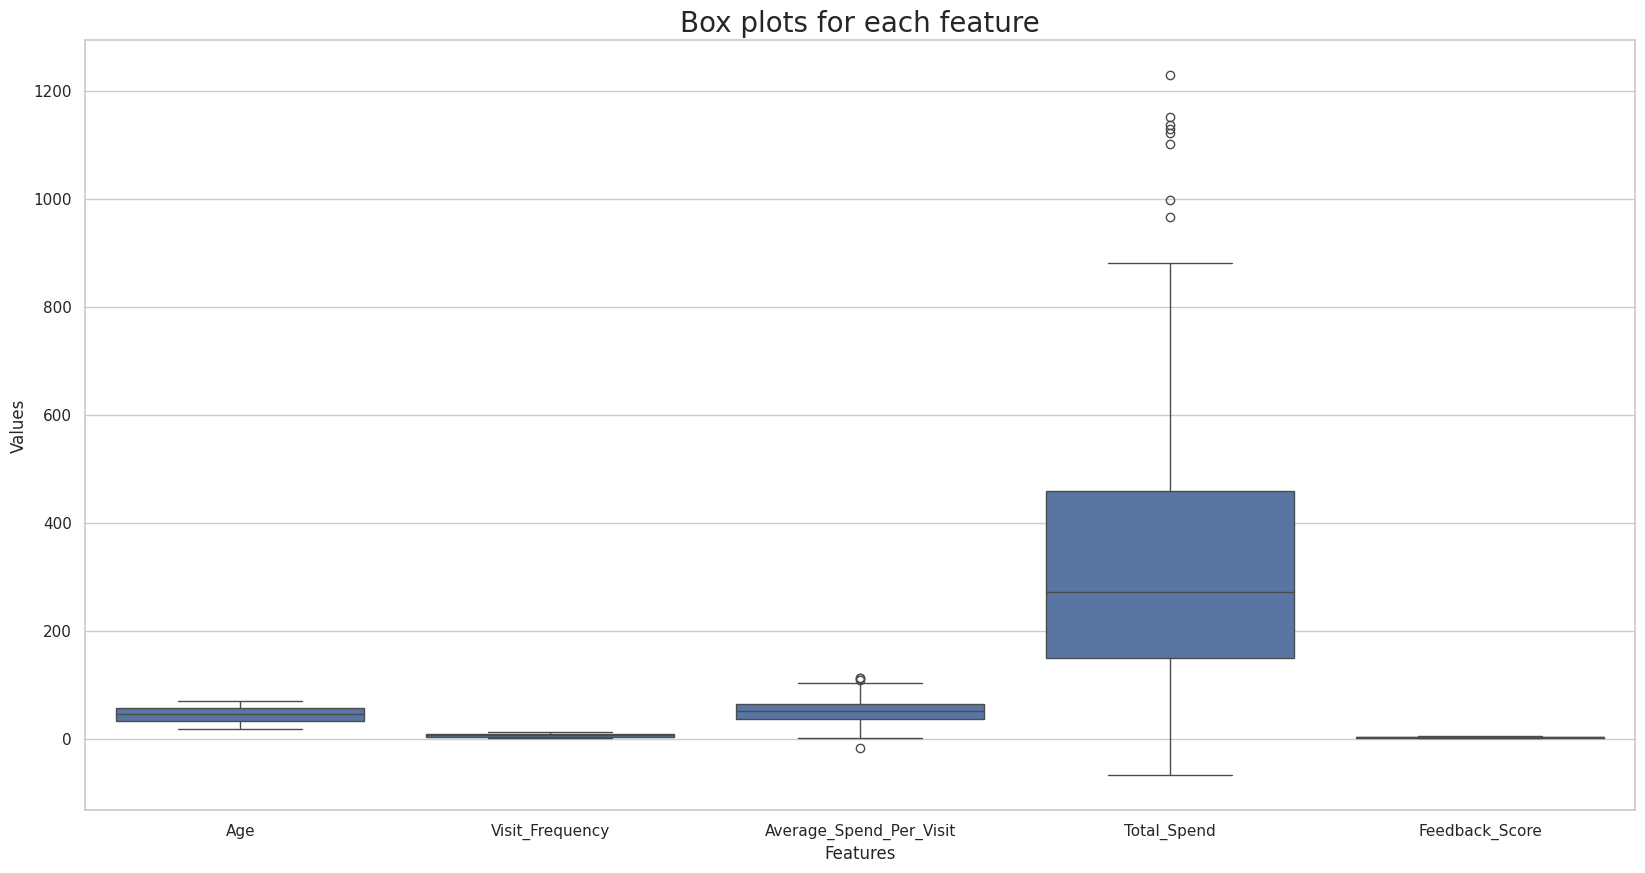

In [35]:
df_melted = num_df.melt(var_name='Features', value_name='Values')

#create  the box plots

plt.figure(figsize=(20,10))
sns.boxplot(x='Features', y='Values', data=df_melted)
plt.title('Box plots for each feature', fontsize=20)
plt.show()

### as you see in the box plot, there is some outliers in the Average_Spend_Per_Visit and Total_Spend columns

### 2.Second approach is using Inter Quartile Range (IQR Method)

- IQR Method is a statistical method used to identify outliers in a dataset by comparing the interquartile range (IQR) of a variable to a threshold value.

- The IQR is calculated as the difference between the 75th percentile and the 25th percentile of the variable.

- Outliers are identified as values that fall outside of a certain range around the median of the variable.

- remove outliers

In [39]:
Q1 = df['Average_Spend_Per_Visit'].quantile(0.25)
Q3 = df['Average_Spend_Per_Visit'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_ASPV = df[(df['Average_Spend_Per_Visit'] < lower_bound) | (df['Average_Spend_Per_Visit'] > upper_bound)]


In [40]:
outliers_ASPV

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
129   40  Female                8        Styling                   111.88   
143   20  Female                8      Treatment                   108.92   
266   20  Female                7  Hair Coloring                   112.84   
427   41    Male                3        Haircut                   -17.77   

     Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  
129       302.86             Yes                   No               2  
143       667.92              No                   No               5  
266       201.92             Yes                  Yes               5  
427       153.08             Yes                  Yes               4

In [41]:
# Remove outliers
df = df[(df['Average_Spend_Per_Visit'] >= lower_bound) & (df['Average_Spend_Per_Visit'] <= upper_bound)]

In [44]:
Q1 = df['Total_Spend'].quantile(0.25)
Q3 = df['Total_Spend'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_TS = df[(df['Total_Spend'] < lower_bound) | (df['Total_Spend'] > upper_bound)]


In [45]:
outliers_TS

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
206   68    Male                9      Treatment                    84.32   
331   33  Female                1  Hair Coloring                    31.24   
333   53  Female               12      Treatment                    37.14   
343   20  Female               10        Haircut                    10.52   
382   54    Male               11        Styling                    34.93   
386   63    Male                2        Haircut                    66.27   
459   50  Female               12      Treatment                    58.51   
490   18  Female                2        Styling                    58.86   

     Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  
206      1121.70             Yes                   No               3  
331      1136.27              No                   No               3  
333      1101.91              No                   No               3  
343       966.65             Yes                   No               1  
382      1151.15              No                   No               4  
386       996.89              No                   No               1  
459      1229.17             Yes                  Yes               3  
490      1129.24              No                   No               1

In [46]:
# Remove outliers
df = df[(df['Total_Spend'] >= lower_bound) & (df['Total_Spend'] <= upper_bound)]

In [47]:
df

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
0     56  Female                3        Haircut                    56.36   
1     69    Male                1      Treatment                    37.41   
2     46    Male                5  Hair Coloring                    53.90   
3     32  Female                4  Hair Coloring                    46.83   
4     60    Male               10        Haircut                    49.17   
..   ...     ...              ...            ...                      ...   
495   65    Male                7        Styling                    35.39   
496   42  Female                5        Haircut                    46.04   
497   57  Female                3        Haircut                    42.40   
498   62    Male                3        Haircut                    48.25   
499   18  Female                4  Hair Coloring                    53.05   

     Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  
0         741.17             Yes                   No               3  
1         300.87              No                   No               2  
2          16.39              No                  Yes               5  
3         528.59              No                  Yes               4  
4         138.68              No                  Yes               3  
..           ...             ...                  ...             ...  
495       422.39              No                   No               5  
496       365.14              No                   No               3  
497       401.85              No                  Yes               1  
498       101.22              No                  Yes               3  
499       235.58              No                  Yes               4  

[488 rows x 9 columns]

In [123]:
df.describe()

Age  Visit_Frequency  Average_Spend_Per_Visit  Total_Spend  \
count  488.000000       488.000000               488.000000   488.000000   
mean    44.323770         6.268443                49.900410   308.316762   
std     14.966413         3.352597                20.529077   210.816537   
min     18.000000         1.000000                 0.630000   -67.370000   
25%     32.000000         3.000000                36.450000   145.410000   
50%     45.000000         6.000000                50.485000   267.570000   
75%     57.000000         9.000000                64.692500   446.490000   
max     69.000000        12.000000               102.580000   881.690000   

       Feedback_Score  
count      488.000000  
mean         3.110656  
std          1.401103  
min          1.000000  
25%          2.000000  
50%          3.000000  
75%          4.000000  
max          5.000000

- still there is some negative values in the Total_Spend column

In [124]:
df[df['Total_Spend'] < 0]

Age Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
155   30   Male                4  Hair Coloring                    62.45   
250   51   Male                7        Styling                    69.59   
380   52   Male                9  Hair Coloring                     3.29   
384   46   Male                2        Haircut                    37.03   

     Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  \
155       -67.37              No                   No               4   
250       -57.11             Yes                   No               4   
380        -0.14              No                   No               5   
384        -2.79              No                   No               3   

       Age_Group Visit_Frequency_Group  
155  Young Adult         Rare Visitors  
250   Middle Age   Occasional Visitors  
380   Middle Age     Frequent Visitors  
384   Middle Age         Rare Visitors

In [125]:
#remove Total_Spend < 0
df = df[df['Total_Spend'] >= 0]

## Now we have a standard dataset

In [126]:
df.describe()

Age  Visit_Frequency  Average_Spend_Per_Visit  Total_Spend  \
count  484.000000       484.000000               484.000000   484.000000   
mean    44.320248         6.274793                49.956694   311.128079   
std     15.006787         3.356787                20.468521   209.374518   
min     18.000000         1.000000                 0.630000     6.660000   
25%     32.000000         3.000000                36.450000   150.290000   
50%     45.000000         6.000000                50.485000   269.800000   
75%     57.000000         9.000000                64.692500   446.680000   
max     69.000000        12.000000               102.580000   881.690000   

       Feedback_Score  
count      484.000000  
mean         3.103306  
std          1.403069  
min          1.000000  
25%          2.000000  
50%          3.000000  
75%          4.000000  
max          5.000000

## Customer Segmentation
#### Customer segmentation is a critical process in analyzing your hair salon dataset.It involves dividing your customers into distinct groups based on shared characteristics, behaviors, or preferences. These segments allow you to understand your customers better, improve marketing strategies, and enhance overall business performance.

##### Why Segment Customers?
1. Targeted Marketing: Tailor promotions and services to specific customer groups.
2. Improved Customer Retention: Identify high-value or at-risk customers and take appropriate action.
3. Resource Allocation: Focus resources (staff, products, offers) where they’re most effective.
4. Enhanced Service Offering: Customize services based on customer needs and preferences.
5. Revenue Optimization: Identify which segments contribute most to revenue.

#  Demographic Segmentation
- Features Used: Age, Gender

Approach:

    - Group customers into age brackets (e.g., 18-25, 26-40, 41-60, 61+).

    - Analyze gender-based preferences for services and spending habits.

Example Insights:

**!** Women aged 25-40 might prefer hair coloring and spend more on treatments.

**!** Men aged 40+ may visit less frequently but spend more on each visit.

In [50]:
# Define conditions
conditions = [
    (df['Age'] >= 1) & (df['Age'] <= 18),
    (df['Age'] >= 19) & (df['Age'] <= 30),
    (df['Age'] >= 31) & (df['Age'] <= 45),
    (df['Age'] >= 46) & (df['Age'] <= 60),
    (df['Age'] >= 61)
]

# Define corresponding values
values = ['Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

# Assign age groups using np.select
df['Age_Group'] = np.select(conditions, values, default='Unknown')

# Behavioral Segmentation
 Features Used: Visit_Frequency, Service_Type, Promotional_Response
## Approach:
Segment customers based on how often they visit:
- Frequent Visitors: Customers with high Visit_Frequency.
- Occasional Visitors: Customers with medium Visit_Frequency.
- Rare Visitors: Customers with low Visit_Frequency.

Analyze service preferences (e.g., haircut vs. hair coloring).
Examine promotional response to determine responsiveness.

Example Insights:

**!** Customers visiting 4+ times per month might be loyal and ideal for upselling.

**!** Rare visitors might need targeted promotions to encourage repeat visits.

In [120]:
# Define conditions
conditions = [
    (df['Visit_Frequency'] >= 1) & (df['Visit_Frequency'] <= 4),
    (df['Visit_Frequency'] >= 5) & (df['Visit_Frequency'] <= 8),
    (df['Visit_Frequency'] >= 9) & (df['Visit_Frequency'] <= 12)
]

# Define corresponding values
values = ['Rare Visitors', 'Occasional Visitors', 'Frequent Visitors']

# Assign age groups using np.select
df['Visit_Frequency_Group'] = np.select(conditions, values, default='Unknown')

# Financial Segmentation
Features Used: Average_Spend_Per_Visit, Total_Spend
### Approach:
Identify high-value customers based on total spending.
Segment customers into spending tiers:
- Low (< $200)
- Medium ($200–$600)
- High (> $600)
Example Insights:

**!** High spenders may need exclusive offers or premium services.

**!** Low spenders could be incentivized with budget-friendly packages.

In [127]:
# Define conditions
conditions = [
    (df['Total_Spend'] >= 1) & (df['Total_Spend'] <= 200),
    (df['Total_Spend'] >= 201) & (df['Total_Spend'] <= 600),
    (df['Total_Spend'] >=601)
]

# Define corresponding values
values = ['Low', 'Medium', 'High']

# Assign age groups using np.select
df['Customer_Value'] = np.select(conditions, values, default='Unknown')

In [128]:
df.head()

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
0   56  Female                3        Haircut                    56.36   
1   69    Male                1      Treatment                    37.41   
2   46    Male                5  Hair Coloring                    53.90   
3   32  Female                4  Hair Coloring                    46.83   
4   60    Male               10        Haircut                    49.17   

   Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  \
0       741.17             Yes                   No               3   
1       300.87              No                   No               2   
2        16.39              No                  Yes               5   
3       528.59              No                  Yes               4   
4       138.68              No                  Yes               3   

    Age_Group Visit_Frequency_Group Customer_Value  
0  Middle Age         Rare Visitors           High  
1      Senior         Rare Visitors         Medium  
2  Middle Age   Occasional Visitors            Low  
3       Adult         Rare Visitors         Medium  
4  Middle Age     Frequent Visitors            Low

In [135]:
df[df['Customer_Value'] == 'Unknown']['Customer_Value'] = 'Medium'

In [137]:
df.replace({'Customer_Value': {'Unknown': 'Medium'}}, inplace=True) 

In [138]:
df[df['Customer_Value'] == 'Unknown']

Empty DataFrame
Columns: [Age, Gender, Visit_Frequency, Service_Type, Average_Spend_Per_Visit, Total_Spend, Loyalty_Program, Promotional_Response, Feedback_Score, Age_Group, Visit_Frequency_Group, Customer_Value]
Index: []

- in below code we group customers by age group and gender and count the number of customers in each group. we can draw a bar chart to show the distribution of customers by age group and gender.

In [61]:
df.groupby(['Age_Group', 'Gender']).count()['Age']

Age_Group    Gender
Adult        Female    81
             Male      63
Middle Age   Female    61
             Male      85
Senior       Female    37
             Male      53
Teenager     Female     5
             Male       6
Young Adult  Female    46
             Male      51
Name: Age, dtype: int64

- in below code we group customers by age group and gender and calculate the average spend per visit and total spend.

In [66]:
df[['Average_Spend_Per_Visit', 'Gender', 'Age_Group']].groupby(['Age_Group', 'Gender']).mean()['Average_Spend_Per_Visit'].round(1)

Age_Group    Gender
Adult        Female    50.2
             Male      52.6
Middle Age   Female    47.9
             Male      49.0
Senior       Female    45.4
             Male      53.5
Teenager     Female    53.9
             Male      58.4
Young Adult  Female    49.2
             Male      48.7
Name: Average_Spend_Per_Visit, dtype: float64

- in below code we group customers by age group and gender and calculate the average  total spend.

In [65]:
df[['Total_Spend', 'Gender', 'Age_Group']].groupby(['Age_Group', 'Gender']).mean()['Total_Spend'].round(1)

Age_Group    Gender
Adult        Female    295.0
             Male      341.6
Middle Age   Female    320.1
             Male      282.7
Senior       Female    386.8
             Male      273.8
Teenager     Female    277.1
             Male      271.6
Young Adult  Female    297.4
             Male      313.1
Name: Total_Spend, dtype: float64

- in below code we group customers by gender and service type and count the number of customers in each group.

In [67]:
df.groupby(['Service_Type', 'Gender']).count()['Age']

Service_Type   Gender
Hair Coloring  Female    66
               Male      61
Haircut        Female    66
               Male      75
Styling        Female    58
               Male      59
Treatment      Female    40
               Male      63
Name: Age, dtype: int64

 - in below code we group customers by age group, gender and service type and count the number of customers in each group.
 

In [78]:
result = (
    df.groupby(['Gender', 'Age_Group', 'Service_Type'])
    .size()
    .reset_index(name='Count') 
)


result['Count'] = result['Count'].round(1)
#pivot the table
result = result.pivot_table(index=['Gender', 'Age_Group'], columns='Service_Type', values='Count').reset_index()




- We can see the distribution of customers by age group, gender and service type.

In [79]:
result

Service_Type  Gender    Age_Group  Hair Coloring  Haircut  Styling  Treatment
0             Female        Adult           27.0     22.0     19.0       13.0
1             Female   Middle Age            9.0     22.0     15.0       15.0
2             Female       Senior           13.0     10.0      8.0        6.0
3             Female     Teenager            3.0      1.0      1.0        NaN
4             Female  Young Adult           14.0     11.0     15.0        6.0
5               Male        Adult           14.0     20.0     11.0       18.0
6               Male   Middle Age           23.0     35.0     18.0        9.0
7               Male       Senior            7.0     11.0     16.0       19.0
8               Male     Teenager            NaN      3.0      2.0        1.0
9               Male  Young Adult           17.0      6.0     12.0       16.0

In [9]:
sns.set_color_codes("pastel")

In [99]:
df.head()

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
0   56  Female                3        Haircut                    56.36   
1   69    Male                1      Treatment                    37.41   
2   46    Male                5  Hair Coloring                    53.90   
3   32  Female                4  Hair Coloring                    46.83   
4   60    Male               10        Haircut                    49.17   

   Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  \
0       741.17             Yes                   No               3   
1       300.87              No                   No               2   
2        16.39              No                  Yes               5   
3       528.59              No                  Yes               4   
4       138.68              No                  Yes               3   

    Age_Group  
0  Middle Age  
1      Senior  
2  Middle Age  
3       Adult  
4  Middle Age

# Plot some Usefull Visualizations

# Why Plot These? What is the Goal?


 #  Age Group Distribution by Gender:

**Goal** : Understand the demographic distribution of customers segmented by age and gender to tailor services or marketing strategies.

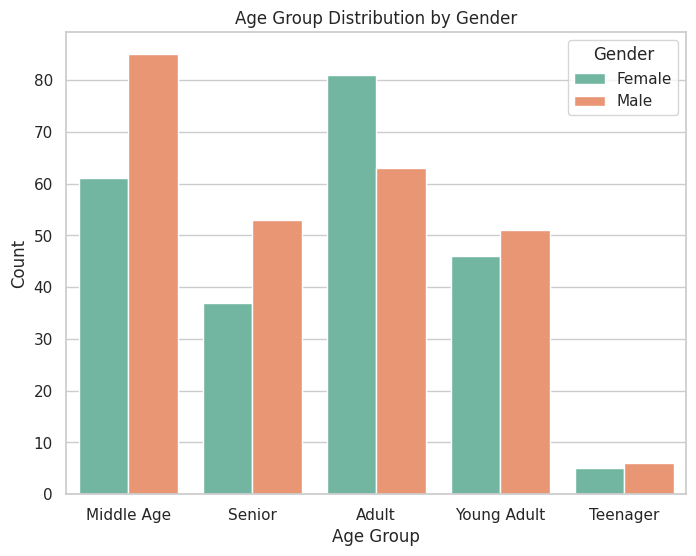

In [101]:
#  Age Group Distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Age_Group", hue="Gender", palette="Set2")
plt.title("Age Group Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


# Analysis of Age Group Distribution by Gender

## Key Observations:
1. **Middle Age Group**:
   - Males dominate this category with a higher count compared to females.
   - This group shows the highest representation of males across all age categories.

2. **Adult Group**:
   - Females have a higher count than males in this age group.
   - This is the most populated category for females, suggesting strong engagement or representation.

3. **Senior Group**:
   - Both genders have similar distributions in this group, but males slightly outnumber females.
   - Indicates consistent representation across genders for seniors.

4. **Young Adult Group**:
   - Males have a slightly higher count than females in this category.
   - The gender distribution is close, but males still lead.

5. **Teenager Group**:
   - This is the least populated category overall.
   - Both genders have minimal representation, with nearly equal counts.

## Insights:
- **Dominant Age Group**: The adult age group (for females) and middle age group (for males) are the most prominent, indicating these are key demographics.
- **Gender Balance**: While males dominate the middle-age category, females lead in the adult group, showcasing potential differences in preferences or availability across these age ranges.
- **Low Representation in Teenagers**: The low numbers in the teenager category could imply limited interest, lower purchasing power, or other factors affecting their participation.

## Recommendations:
1. **Targeted Marketing**:
   - Focus on tailored campaigns for males in the middle-age group and females in the adult group to maximize engagement and revenue.
   - Consider initiatives to better attract and engage the teenager group, such as discounts or youth-specific offerings.

2. **Service Customization**:
   - Evaluate service preferences for dominant groups (middle-age males and adult females) to cater to their needs effectively.
   - Develop strategies to ensure equal representation across other groups.

3. **Balanced Resource Allocation**:
   - Allocate resources based on age group distribution to ensure optimal service delivery without neglecting minority groups.

The chart highlights valuable patterns in customer demographics, which can be leveraged to improve marketing strategies and resource planning.


# Average Spend per Visit vs. Total Spend by Service Type:

**Goal** : Identify spending patterns and high-value customers based on service type, helping prioritize services or customers for upselling and promotions.

<Axes: xlabel='Average_Spend_Per_Visit', ylabel='Total_Spend'>

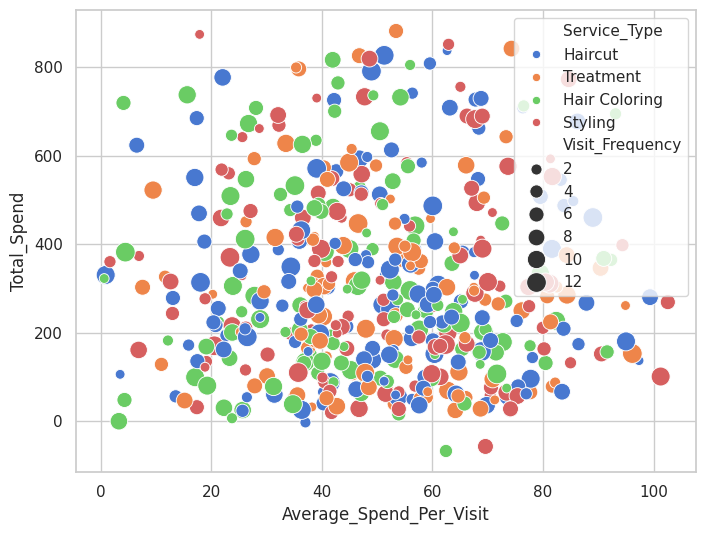

In [102]:
#  Average Spend per Visit vs. Total Spend by Service Type
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x="Average_Spend_Per_Visit", 
    y="Total_Spend", 
    hue="Service_Type", 
    size="Visit_Frequency", 
    palette="muted", 
    sizes=(50, 200)
)

# Analysis of Average Spend Per Visit vs. Total Spend

## Key Observations:
1. **Correlation Between Average Spend and Total Spend**:
   - There is a general upward trend, indicating that customers with a higher average spend per visit also tend to have a higher total spend.
   - However, the data is widely scattered, suggesting variability in visit frequency and service usage.

2. **Service Type Distribution**:
   - **Haircut (Blue)**: The most frequently observed service, distributed across all ranges of total spend and average spend.
   - **Treatment (Orange)**: Appears frequently and is concentrated around moderate average spend (20-60) but extends to higher total spend values.
   - **Hair Coloring (Green)**: Shows a balanced distribution but leans toward higher average spend ranges, indicating that it may be a premium service.
   - **Styling (Red)**: Less frequent but spread across both lower and higher average spend, indicating varying customer behavior for this service.

3. **Visit Frequency (Bubble Size)**:
   - Larger bubbles, representing higher visit frequencies, are mostly concentrated in the mid-range of average spend (30-60) and moderate to high total spend (200-800).
   - Customers with lower visit frequencies (smaller bubbles) are scattered across all ranges, indicating occasional or one-time users.

## Insights:
1. **Service Preferences**:
   - Haircuts dominate the dataset, suggesting it is the most common service.
   - Hair Coloring is associated with higher average spend per visit, making it an important service for premium customers.

2. **Customer Spending Behavior**:
   - Customers with higher total spend tend to have both a higher average spend per visit and higher visit frequencies.
   - There is significant variability in spending patterns, especially among lower-spending customers.

3. **Visit Frequency Impact**:
   - High visit frequency correlates with higher total spend, even for moderate average spend per visit.
   - Encouraging repeat visits could drive total revenue without necessarily increasing the average spend.

## Recommendations:
1. **Target High-Value Customers**:
   - Focus on customers using Hair Coloring or other premium services, as they contribute significantly to revenue.
   - Offer exclusive promotions or loyalty benefits to these customers to increase their visit frequency.

2. **Boost Visit Frequency**:
   - Design loyalty programs or incentives to encourage repeat visits, especially for customers with moderate average spend.

3. **Service-Specific Campaigns**:
   - Promote Haircuts and Treatments, as they have a wide customer base and potential for upselling.
   - Highlight premium services like Hair Coloring to attract higher-spending customers.

4. **Analyze Outliers**:
   - Investigate customers with low average spend but high total spend or vice versa to understand their behavior and design targeted strategies.

This scatter plot provides valuable insights into spending patterns, service preferences, and customer segmentation, enabling data-driven decisions for enhancing business outcomes.


# Loyalty Program Membership vs. Promotional Response:

**Goal** : Analyze the relationship between loyalty program membership and responsiveness to promotions, which can guide retention strategies and promotion effectiveness.

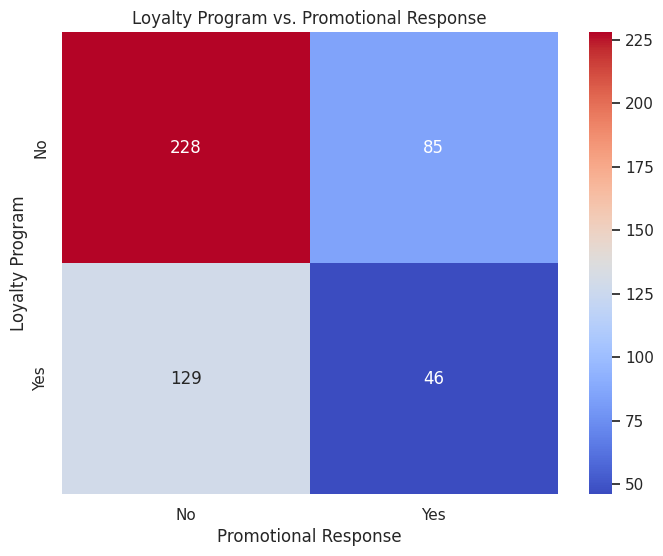

In [103]:
#  Loyalty Program Membership vs. Promotional Response
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.groupby(["Loyalty_Program", "Promotional_Response"]).size().unstack(), 
    annot=True, 
    fmt="d", 
    cmap="coolwarm"
)
plt.title("Loyalty Program vs. Promotional Response")
plt.xlabel("Promotional Response")
plt.ylabel("Loyalty Program")
plt.show()

# Analysis of Loyalty Program vs. Promotional Response

## Key Observations:
1. **Non-Loyalty Program Members**:
   - A majority (228) of non-loyalty program members did not respond to promotions.
   - Only 85 non-loyalty program members responded positively to promotions.

2. **Loyalty Program Members**:
   - Among loyalty program members, 129 did not respond to promotions.
   - A smaller group (46) of loyalty program members responded positively to promotions.

3. **General Insights**:
   - Customers not enrolled in the loyalty program outnumber those who are.
   - Both groups (loyalty program members and non-members) show a higher count of non-responses to promotions compared to positive responses.
   - Loyalty program members seem slightly more likely to respond positively to promotions (46 out of 175 total members, ~26%) compared to non-members (85 out of 313 total non-members, ~27%).

## Insights:
1. **Effectiveness of Promotions**:
   - Promotions seem to have a limited response rate overall, irrespective of loyalty program enrollment.
   - However, loyalty program members show slightly more responsiveness relative to their total count, suggesting some influence of the program on engagement.

2. **Loyalty Program Membership**:
   - The proportion of customers enrolled in the loyalty program is smaller compared to non-members. This indicates a potential need for improving loyalty program adoption.

## Recommendations:
1. **Enhance Promotional Strategies**:
   - Reevaluate current promotions to ensure they are appealing and target customer needs effectively.
   - Tailor promotions specifically for loyalty program members to increase their engagement further.

2. **Increase Loyalty Program Enrollment**:
   - Promote the benefits of the loyalty program to increase membership.
   - Offer exclusive promotions or discounts for new enrollees as an incentive.

3. **Segmentation Analysis**:
   - Further analyze non-responders to identify patterns and tailor strategies to convert them into responders.
   - Identify high-value customers among loyalty members and prioritize targeted promotions for this segment.

4. **A/B Testing of Campaigns**:
   - Conduct experiments with different promotion types (e.g., discounts, bundled offers) to determine which strategies yield the highest engagement among both loyalty program members and non-members.

This heatmap underscores the need to strengthen promotional strategies and leverage the loyalty program for better customer engagement and response rates.


# Feedback Score Distribution by Service Type:

**Goal** : Evaluate customer satisfaction for different services, identifying areas for improvement.

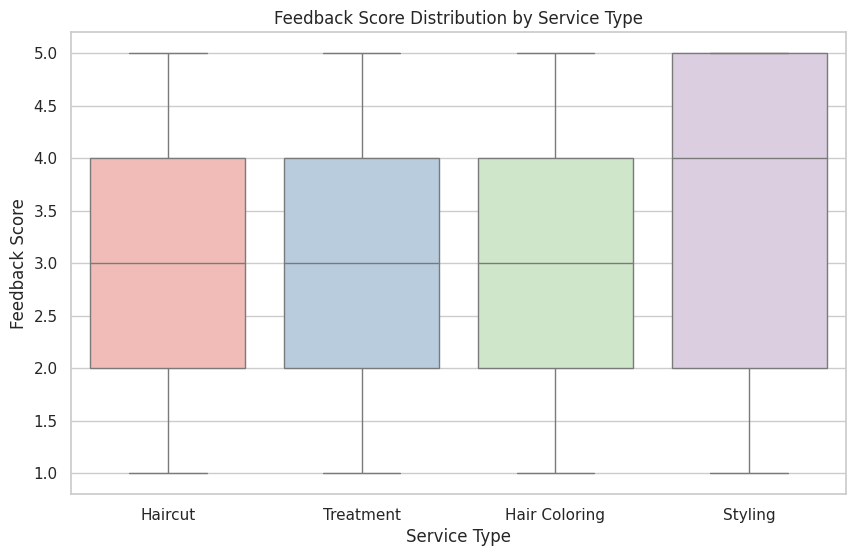

In [107]:
# 4. Feedback Score Distribution by Service Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Service_Type", y="Feedback_Score", palette="Pastel1")
plt.title("Feedback Score Distribution by Service Type")
plt.xlabel("Service Type")
plt.ylabel("Feedback Score")
plt.show()

# Analysis of Feedback Score Distribution by Service Type

## Summary
The box plot illustrates the distribution of feedback scores for four types of services: Haircut, Treatment, Hair Coloring, and Styling. Feedback scores range from 1 to 5.

### Key Observations
1. **Styling**:
   - Highest median feedback score (5.0), indicating relatively higher customer satisfaction.
   - Wider interquartile range (IQR) compared to other services, showing more variability in feedback scores.
   - Upper and lower whiskers span the full range (1-5), indicating a mix of very positive and negative feedback.

2. **Haircut** , **Treatment**, and **Hair Coloring**:
   - Median feedback score is 3.0, slightly lower than Styling.
   - Feedback scores are concentrated, with a smaller IQR, suggesting more consistency in customer opinions.
   - Whiskers also span the full range (1-5), indicating mixed feedback.


### Conclusion
The Styling service has the highest median feedback and the widest variability in customer satisfaction. Haircut and Treatment and Hair Coloring services are relatively consistent in feedback,  indicating an area that might need improvement. All services exhibit a full range of feedback scores, from very positive to very negative.

Efforts to enhance customer satisfaction in Hair Coloring and sustain high satisfaction levels in Styling can further improve overall service quality.



In [11]:
sns.set_style("whitegrid")

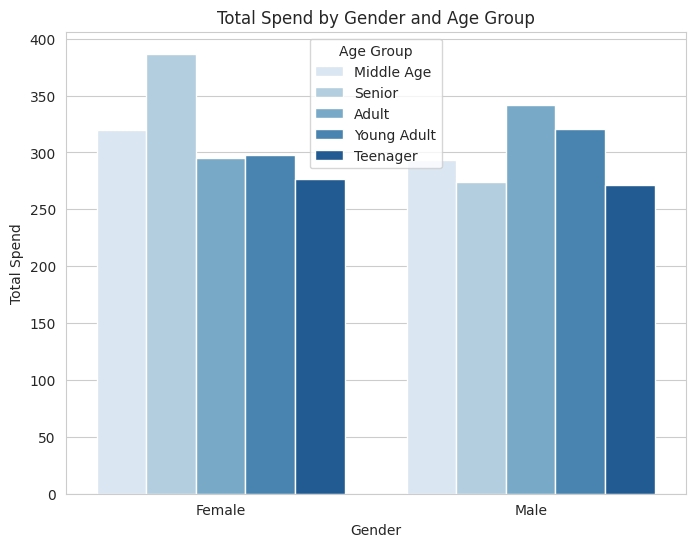

In [12]:
#  Gender-wise Spend Analysis
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Gender", y="Total_Spend", hue="Age_Group", ci=None, palette="Blues")
plt.title("Total Spend by Gender and Age Group")
plt.xlabel("Gender")
plt.ylabel("Total Spend")
plt.legend(title="Age Group")
plt.show()

# Analysis of Total Spend by Gender and Age Group

## Summary
The bar chart displays the total spending patterns segmented by gender and further categorized into five age groups: Middle Age, Senior, Adult, Young Adult, and Teenager. The analysis reveals key spending trends across these demographics.

### Key Observations
1. **Gender Differences**:
   - Both genders exhibit similar total spending trends, with Middle Age individuals being the highest spenders.
   - Females slightly outspend males in the Middle Age group, while spending is comparable in other age groups.

2. **Age Group Insights**:
   - **Middle Age**:
     - The highest spending group for both genders.
   - **Teenagers**:
     - The lowest spending age group across genders.
   - **Senior and Adult Groups**:
     - Consistent spending patterns, with no significant difference between genders.
   - **Young Adults**:
     - Moderate spending compared to Middle Age and Teenagers, with comparable levels across genders.

### Conclusion
Middle Age individuals, particularly females, dominate total spending, likely due to higher financial independence and purchasing power in this demographic. Teenagers spend the least, reflecting limited financial resources. These insights can help in tailoring marketing strategies to maximize engagement with high-spending demographics.

In [112]:
num_df

Age  Visit_Frequency  Average_Spend_Per_Visit  Total_Spend  \
0     56                3                    56.36       741.17   
1     69                1                    37.41       300.87   
2     46                5                    53.90        16.39   
3     32                4                    46.83       528.59   
4     60               10                    49.17       138.68   
..   ...              ...                      ...          ...   
495   65                7                    35.39       422.39   
496   42                5                    46.04       365.14   
497   57                3                    42.40       401.85   
498   62                3                    48.25       101.22   
499   18                4                    53.05       235.58   

     Feedback_Score  
0                 3  
1                 2  
2                 5  
3                 4  
4                 3  
..              ...  
495               5  
496               3  
497               1  
498               3  
499               4  

[500 rows x 5 columns]

- Pair Plot with Enhanced Insights:

**Why** : It explores relationships between numerical variables like Age, Total_Spend, Feedback_Score, and Visit_Frequency grouped by Feedback_Score.
**Goal** : Identify patterns or clusters to better understand customer behavior.

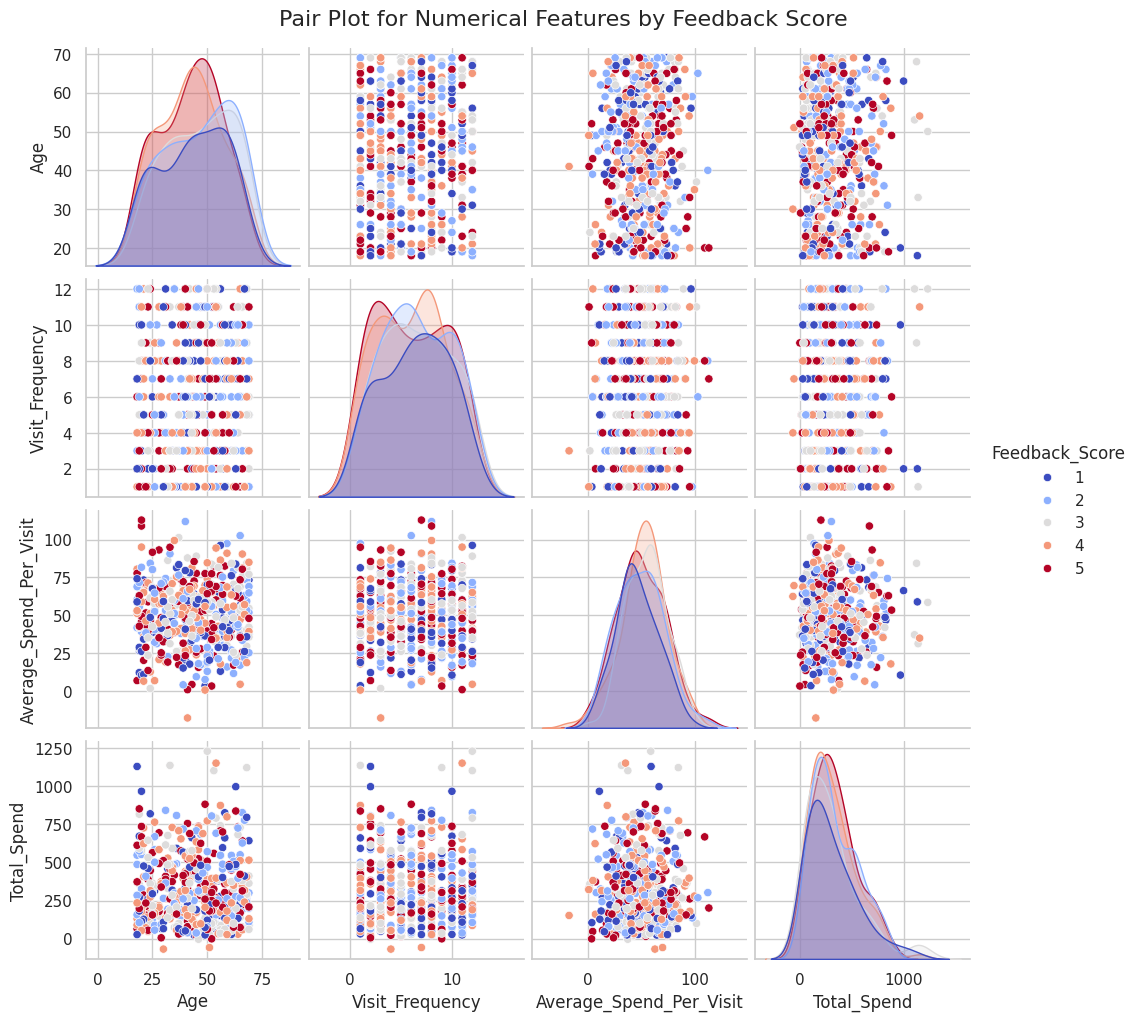

In [113]:
#  Pair Plot with Enhanced Insights
sns.pairplot(num_df, hue="Feedback_Score", diag_kind="kde", palette="coolwarm", height=2.5)
plt.suptitle("Pair Plot for Numerical Features by Feedback Score", y=1.02, fontsize=16)
plt.show()

# Analysis of Pair Plot for Numerical Features by Feedback Score

## Summary of Observations

The pair plot illustrates the relationships between four numerical features: **Age**, **Visit Frequency**, **Average Spend Per Visit**, and **Total Spend**, categorized by feedback scores (1 to 5).

### Key Insights:

1. **Age Distribution:**
   - Most customers fall within a middle age range, roughly 30-50 years old.
   - Feedback scores are distributed across all age groups, but higher scores (4 and 5) appear slightly more frequent among middle-aged individuals.

2. **Visit Frequency vs. Feedback:**
   - Frequent visitors (10 or more visits) tend to give higher feedback scores (4 and 5).
   - Low visit frequency (2-5 visits) corresponds more often with lower feedback scores (1 and 2).

3. **Average Spend Per Visit:**
   - Spending per visit is centered around 50-100 units.
   - Higher feedback scores correlate with moderately higher spending values, but the difference isn’t stark.

4. **Total Spend:**
   - Customers with higher total spending (>500 units) are more likely to give better feedback (scores 4 and 5).
   - Total spend combines visit frequency and spending per visit, showing that loyal, high-spending customers are often more satisfied.

5. **Feature Relationships:**
   - **Age and Visit Frequency:** No significant relationship; all age groups show varied visit frequency.
   - **Visit Frequency and Total Spend:** Positive correlation – higher visit frequency generally leads to greater total spend.
   - **Average Spend and Feedback:** High-spend individuals are likelier to give favorable feedback.

## Conclusion

This analysis reveals that **visit frequency** and **total spending** are the strongest indicators of higher feedback scores, while factors like age and spending per visit show less pronounced effects. Businesses can focus on encouraging repeat visits and building loyalty among high-spending customers to improve overall satisfaction.



- Combined Bar and Line Plot:

**Why** : Combines bar and line plots to show Average_Spend_Per_Visit and Visit_Frequency together by Service_Type.
**Goal** : Highlight which services have higher average spends and visit frequencies for optimal focus.

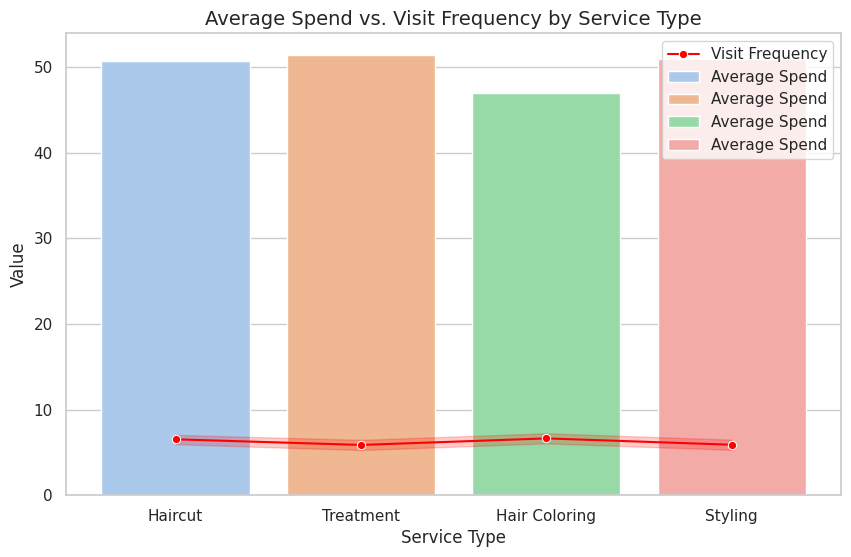

In [114]:
#  Combined Bar and Line Plot for Average Spend by Service Type and Visit Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Service_Type", y="Average_Spend_Per_Visit", ci=None, palette="pastel", label="Average Spend")
sns.lineplot(data=df, x="Service_Type", y="Visit_Frequency", color="red", marker="o", label="Visit Frequency")
plt.title("Average Spend vs. Visit Frequency by Service Type", fontsize=14)
plt.xlabel("Service Type")
plt.ylabel("Value")
plt.legend()
plt.show()

# Analysis of the Plot: Average Spend vs. Visit Frequency by Service Type

## Key Insights
1. **Service Categories**:
   - The services analyzed include Haircut, Treatment, Hair Coloring, and Styling.

2. **Average Spend**:
   - Average spending across all service categories is relatively consistent, ranging between 45 to 50 units.

3. **Visit Frequency**:
   - The visit frequency is represented by the red line and is significantly lower than the average spending. It remains fairly stable across all service types, with only slight variations.

4. **Comparative Observation**:
   - Despite the higher average spending per service, the visit frequency does not vary much, indicating that customers' visiting habits may not directly correlate with spending levels.

## Conclusion
The plot suggests that while average spending for services like Haircut, Treatment, Hair Coloring, and Styling is high, the visit frequency is relatively low and consistent across all services. This could imply that these services are used sparingly but come with a significant cost per visit.


# Heatmap for Spend and Feedback Correlations:

**Why** : A heatmap visually showcases correlations between numerical features like Average_Spend_Per_Visit, Total_Spend, and Feedback_Score.

**Goal** : Identify relationships, such as whether higher spending is linked to better feedback or loyalty.

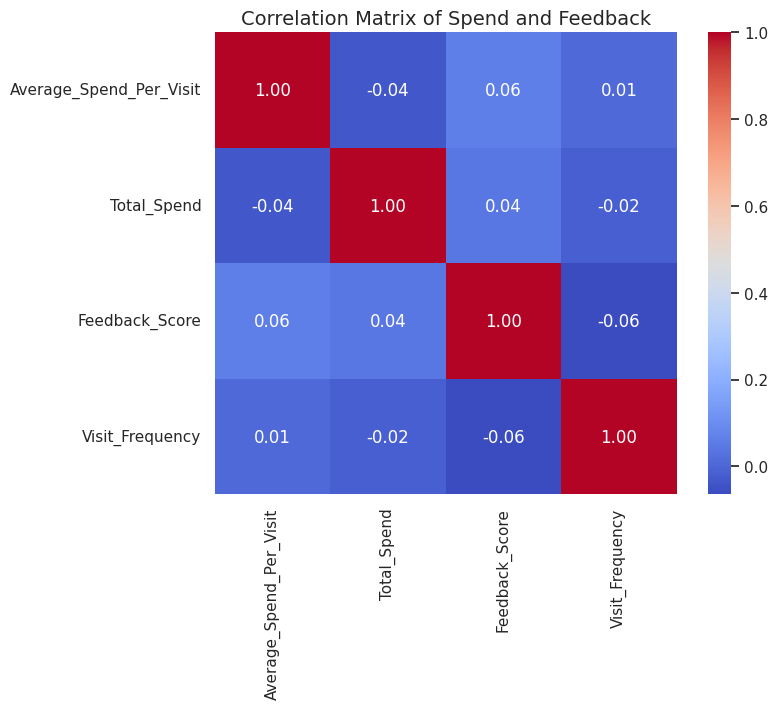

In [116]:
#  Heatmap of Spend and Feedback Scores (Correlation Matrix Style)
corr_data = df[["Average_Spend_Per_Visit", "Total_Spend", "Feedback_Score", "Visit_Frequency"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap="coolwarm", square=True, )
plt.title("Correlation Matrix of Spend and Feedback", fontsize=14)
plt.show()

# Analysis of Correlation Matrix of Spend and Feedback

## Key Observations
1. **Diagonal Correlation**:
   - As expected, each variable shows perfect correlation with itself (value of 1.00 along the diagonal).

2. **Relationship Between Variables**:
   - **Average_Spend_Per_Visit and Feedback_Score**:
     - A slight positive correlation (0.06) exists, indicating minimal influence of spending per visit on feedback scores.
   - **Total_Spend and Feedback_Score**:
     - A weak positive correlation (0.04) suggests a slight tendency for total spend to align with better feedback.
   - **Visit_Frequency and Other Metrics**:
     - Visit frequency shows almost no correlation with other metrics (0.01 to -0.06), indicating it operates independently.

3. **Notable Insights**:
   - The variables exhibit minimal to no strong correlations, suggesting that the spending behavior, feedback scores, and visit frequency are largely independent of one another.

## Conclusion
The correlation matrix reveals weak interrelations among the variables analyzed. Factors such as visit frequency and spending habits have limited impact on feedback scores, suggesting customer satisfaction and spending patterns may be influenced by other external factors.


- FacetGrid for Age Group Analysis:

**Why** : Uses FacetGrid to plot Average_Spend_Per_Visit against Total_Spend, segmented by Age_Group, with Gender and Loyalty_Program distinctions.

**Goal** : Identify spending behaviors across age groups, gender, and loyalty membership.

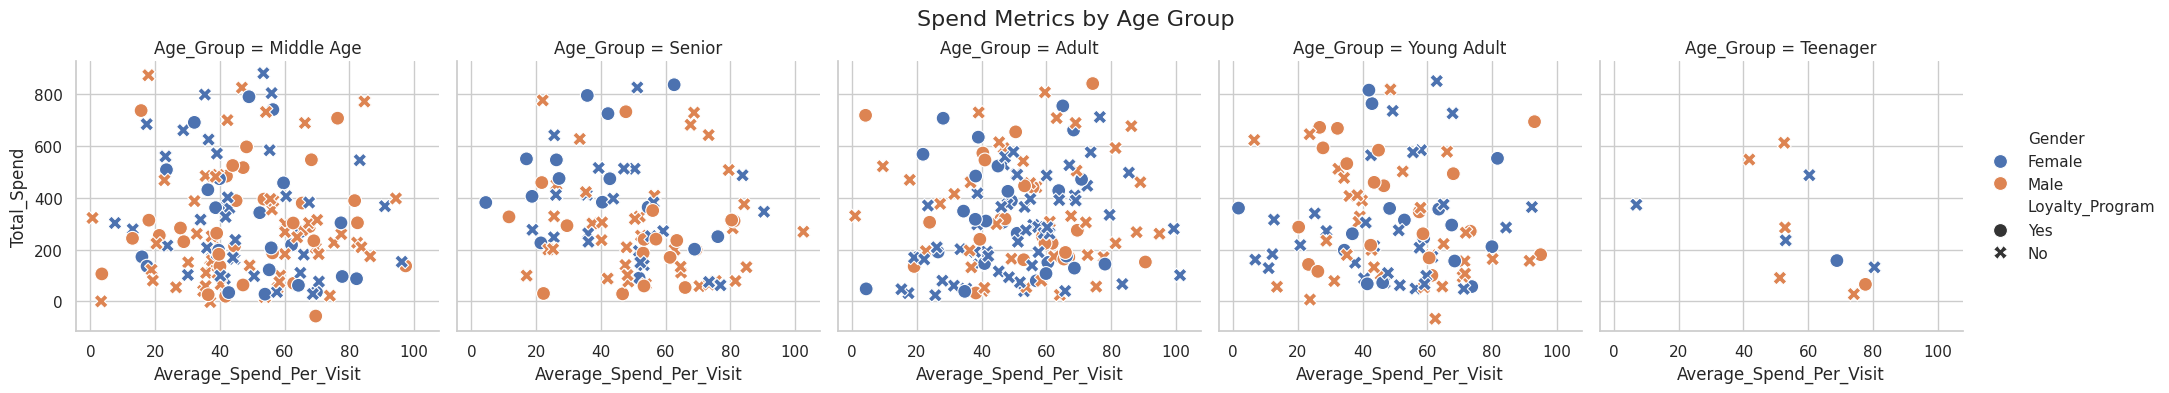

In [118]:
# FacetGrid: Age Group Analysis Across Spend Metrics
g = sns.FacetGrid(df, col="Age_Group", height=4, aspect=1, palette="muted")
g.map(sns.scatterplot, "Average_Spend_Per_Visit", "Total_Spend", hue="Gender", style="Loyalty_Program", s=100, data=df)
g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Spend Metrics by Age Group", fontsize=16)
plt.show()


# Analysis of Spend Metrics by Age Group

## Overview
The scatter plots depict the relationship between **Average Spend Per Visit** and **Total Spend** across different age groups (Teenager, Young Adult, Adult, Middle Age, and Senior). The data points are further categorized by **Gender** (Male and Female) and **Loyalty Program Participation** (Yes or No).

## Key Observations
1. **Age Groups**:
   - **Middle Age and Senior**:
     - Higher total spend is more frequent in these groups, especially for individuals with higher average spending per visit.
   - **Teenagers and Young Adults**:
     - Total spend tends to be lower, and data points are more clustered, indicating less variability in spending behavior.
   - **Adults**:
     - A moderate spread in both average spend per visit and total spend is observed.

2. **Gender Differences**:
   - Both genders are distributed relatively evenly across spending levels, with no significant difference in spending behavior apparent from the scatter plots.

3. **Loyalty Program Participation**:
   - Individuals participating in the loyalty program (circles) show a slight tendency towards higher total spend compared to non-participants (crosses), particularly in the Middle Age and Senior groups.

4. **General Trend**:
   - Higher **Average Spend Per Visit** generally correlates with higher **Total Spend**, though the strength of this relationship varies across age groups.

## Conclusion
The analysis reveals that age plays a significant role in spending behavior:
- Middle-aged and senior individuals tend to spend more overall.
- Loyalty program participation may positively influence total spending, especially in older age groups.
- Gender differences in spending are minimal across all age groups.


# Customer Value Distribution by Age Group
**Goal** : Understand the distribution of customer value categories (High, Medium, Low) across different age groups. This helps target specific age groups for marketing or service improvements.

**Customer Value Distribution by Age Group** Highlights how customer value is distributed among age segments, aiding in age-specific marketing or service customization.

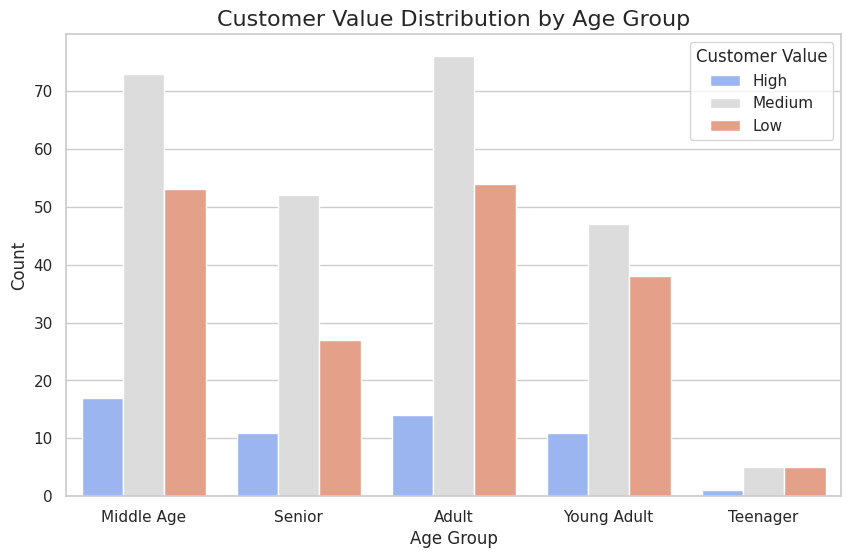

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Age_Group", hue="Customer_Value", palette="coolwarm")
plt.title("Customer Value Distribution by Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Customer Value")
plt.show()

# Analysis of Customer Value Distribution by Age Group

## Overview
The bar chart displays the distribution of customer value (categorized as High, Medium, and Low) across five different age groups: **Middle Age**, **Senior**, **Adult**, **Young Adult**, and **Teenager**. This analysis highlights the trends and patterns observed in customer value based on the given data.

## Key Insights
1. **Dominance of Medium Value Across Groups**:
   - For most age groups (Middle Age, Senior, Adult, Young Adult), the majority of customers are categorized under **Medium** customer value.
   - The **Teenager** group shows significantly lower counts in all customer value categories compared to other groups.

2. **Distribution of Low Value**:
   - The **Low** customer value category is prominent in **Middle Age**, **Adult**, and **Young Adult** groups.
   - A noticeable drop in the count of **Low** customer value customers occurs for the **Senior** and **Teenager** age groups.

3. **High Customer Value**:
   - The **High** customer value category is consistently the smallest across all age groups.
   - The counts for **High** value customers are notably higher in **Middle Age** and **Adult** groups compared to others.

## Trends by Age Group
- **Middle Age**:
  - Dominated by Medium and Low customer value.
  - Shows a small but notable count for High value.

- **Senior**:
  - Medium value is highest, but both Low and High values have significantly fewer customers.

- **Adult**:
  - Similar to Middle Age with a large count in Medium and Low categories.
  - A slightly higher representation in the High value compared to Seniors.

- **Young Adult**:
  - Fewer customers overall compared to Middle Age and Adult.
  - Distribution leans heavily towards Medium and Low categories.

- **Teenager**:
  - A small segment with minimal representation in all categories, indicating limited engagement or customer value.

## Conclusion
- The **Medium customer value** is the most prevalent category across all age groups, suggesting a common trend of moderate customer engagement or contribution.
- **Teenagers** and **High value** customers form the minority segments, pointing to potential areas for targeted strategies to improve engagement or value.

---

## Recommendations
1. Focus on strategies to boost the **High customer value** segment, especially in **Young Adult** and **Teenager** groups.
2. Investigate reasons for the dominance of **Medium value** across age groups and explore ways to convert Medium-value customers into High-value customers.
3. Consider tailored engagement approaches for **Teenagers**, who currently show the lowest involvement.


# Visit Frequency and Customer Value by Service Type
**Goal** : Compare visit frequency and customer value across different services to identify popular services and high-value customers. A combined bar and scatter plot visually captures this insight.

**Visit Frequency and Customer Value by Service Type** Identifies high-value customers and popular services, helping prioritize service offerings and loyalty initiatives.

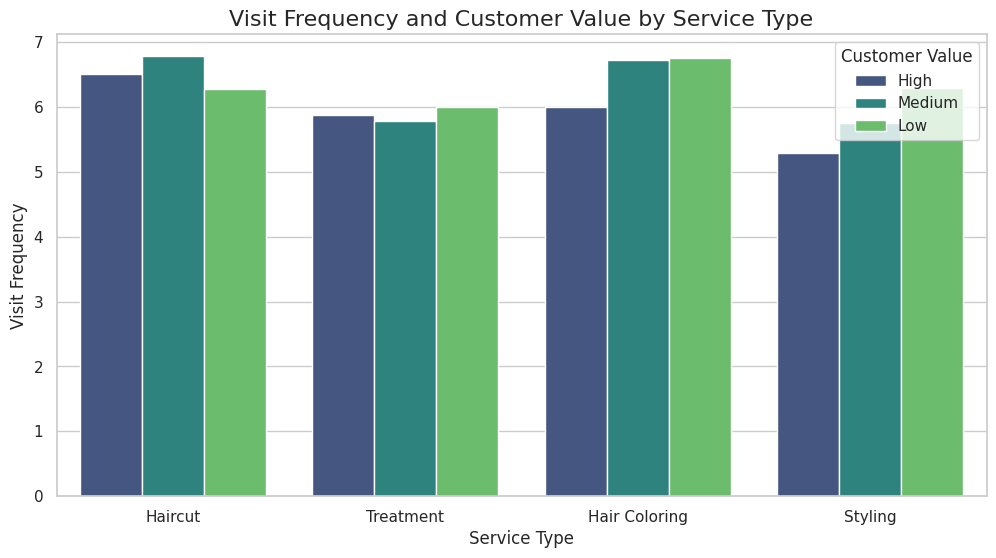

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Service_Type", y="Visit_Frequency", hue="Customer_Value", ci=None, palette="viridis", dodge=True)
#sns.swarmplot(data=df, x="Service_Type", y="Visit_Frequency", hue="Customer_Value", dodge=True, color=".25", size=8, legend=False)
plt.title("Visit Frequency and Customer Value by Service Type", fontsize=16)
plt.xlabel("Service Type")
plt.ylabel("Visit Frequency")
plt.legend(title="Customer Value")
plt.show()


# Analysis of Visit Frequency and Customer Value by Service Type

## Overview
The bar chart depicts the visit frequency of customers categorized by customer value (High, Medium, Low) across four service types: **Haircut**, **Treatment**, **Hair Coloring**, and **Styling**. This analysis examines the trends and insights regarding customer preferences and their engagement levels.

## Key Insights
1. **Dominance of Medium and Low Value**:
   - Across all service types, **Medium** and **Low** customer values are the most frequent categories.
   - **High** customer value consistently lags behind the other two categories for all services.

2. **Service-Specific Trends**:
   - **Haircut**:
     - The highest frequency for Medium and Low values, suggesting Haircut services are popular across broader customer segments.
     - High value customers have a moderate frequency compared to the other groups.
   - **Treatment**:
     - Similar to Haircut, Medium and Low values dominate. However, the frequency for High value is slightly lower than Haircut.
   - **Hair Coloring**:
     - Shows the highest frequency for **Medium** and **Low** customers compared to other services.
     - High value customers are present but still underrepresented.
   - **Styling**:
     - Lower visit frequencies for all value categories compared to Haircut and Hair Coloring.
     - Medium value customers maintain the highest frequency.

3. **Comparative Representation**:
   - **Low value customers** tend to have slightly higher visit frequencies than **High value customers** across all services except Haircut, where Medium value dominates.

## Trends by Service Type
- **Haircut**:
  - The most popular service overall, with balanced engagement across Low and Medium customer values.
  - High value customers show moderate frequency.

- **Treatment**:
  - Slightly lower overall visit frequency compared to Haircut.
  - High value customer participation is minimal.

- **Hair Coloring**:
  - High engagement from Medium and Low value customers.
  - High value customers remain less frequent but better represented than in Styling.

- **Styling**:
  - Displays the lowest engagement levels across all value categories.
  - Medium value still leads, but High value is minimal.

## Conclusion
- The **Medium** customer value category leads in visit frequency across all service types, demonstrating broad engagement from this segment.
- **High value customers** consistently show lower visit frequencies, indicating limited engagement with services.
- **Haircut** and **Hair Coloring** services are the most popular among Medium and Low value customers, while **Styling** sees the least participation overall.

---

## Recommendations
1. Develop strategies to increase **High value customer** engagement, particularly for **Styling** and **Treatment** services.
2. Leverage the popularity of **Haircut** and **Hair Coloring** services to upsell and convert Medium and Low value customers into High value customers.
3. Focus on marketing campaigns tailored to improve visit frequencies for **Styling**, which shows the lowest overall engagement.


# Heatmap: Average Spend and Total Spend by Customer Segments
**Goal** : Show relationships between spending metrics (Average_Spend_Per_Visit, Total_Spend) and categorical features like Age_Group and Customer_Value. A heatmap provides a concise overview of spending trends.

**Heatmap of Total Spend by Age Group and Customer Value** Provides a quick overview of spending patterns across age and value categories, enabling data-driven decision-making.

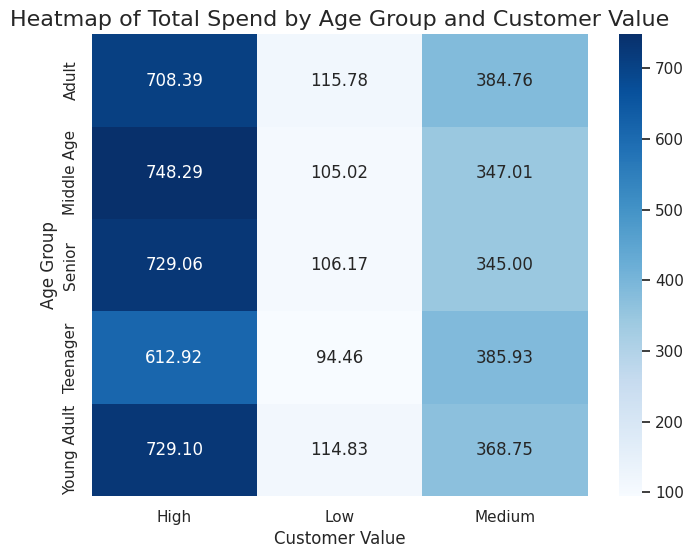

In [146]:
pivot_data = df.pivot_table(
    values="Total_Spend",
    index="Age_Group",
    columns="Customer_Value",
    aggfunc="mean"
)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Total Spend by Age Group and Customer Value", fontsize=16)
plt.xlabel("Customer Value")
plt.ylabel("Age Group")
plt.show()


# Analysis of Total Spend by Age Group and Customer Value

## Overview
The heatmap visualizes the mean of total spending by different **Age Groups** (Adult, Middle Age, Senior, Teenager, Young Adult) and **Customer Value categories** (High, Medium, Low). Darker shades indicate higher spending levels, with precise numerical values provided for clarity. This analysis examines spending behavior and identifies key trends across demographics.

## Key Insights
1. **High Customer Value**:
   - **Middle Age** customers exhibit the highest spending (\$748.29), followed by **Young Adults** (\$729.10) and **Seniors** (\$729.06).
   - **Teenagers** spend the least (\$612.92) among High-value customers, reflecting lower financial engagement.

2. **Medium Customer Value**:
   - Spending levels are relatively consistent across groups, with **Teenagers** showing slightly higher spending (\$385.93).
   - The lowest spending in this category is observed among **Middle Age** customers (\$347.01).

3. **Low Customer Value**:
   - Spending is minimal across all age groups, with the highest (\$115.78) in **Adults** and the lowest (\$94.46) in **Teenagers**.
   - This segment reflects a negligible contribution compared to High and Medium categories.

4. **Age Group Analysis**:
   - **Middle Age** customers lead in total spending for High-value categories, emphasizing their financial contribution.
   - **Teenagers** consistently spend the least across all value categories, with particularly low engagement in the Low and High segments.
   - **Adults**, **Young Adults**, and **Seniors** demonstrate balanced spending trends, with peaks in the High-value category.

## Trends by Age Group
- **Adults**:
  - Spend significantly more in the High-value category (\$708.39) compared to Low (\$115.78) and Medium (\$384.76).
  - Indicate strong engagement with premium services or products.

- **Middle Age**:
  - Lead in High-value spending (\$748.29), indicating a key demographic for high-revenue products or services.
  - Moderate spending in Medium value


# FacetGrid: Promotional Response and Feedback by Customer Value
**Goal** : Examine the relationship between promotional response, feedback score, and customer value using a faceted scatter plot. This helps understand the effectiveness of promotions on different customer segments

**Promotional Response and Feedback by Customer Value** Demonstrates the effectiveness of promotions and feedback trends, helping fine-tune promotional strategies.

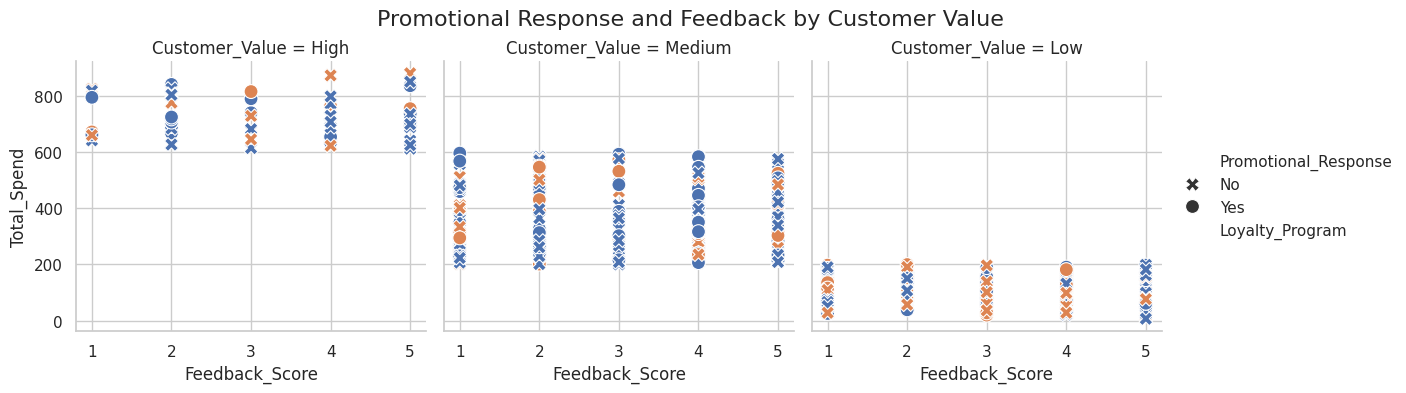

In [147]:
g = sns.FacetGrid(df, col="Customer_Value", height=4, aspect=1, palette="muted")
g.map(sns.scatterplot, "Feedback_Score", "Total_Spend", hue="Promotional_Response", style="Loyalty_Program", s=100, data=df)
g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Promotional Response and Feedback by Customer Value", fontsize=16)
plt.show()


# Box Plot: Average Spend by Visit Frequency Group
**Goal** : Analyze spending behavior across visit frequency groups (Rare Visitors, Occasional Visitors). Boxplots highlight the variability and median spending.

**Box Plot of Average Spend by Visit Frequency Group** Shows spending habits based on visit frequency, revealing insights about rare vs. frequent visitors.

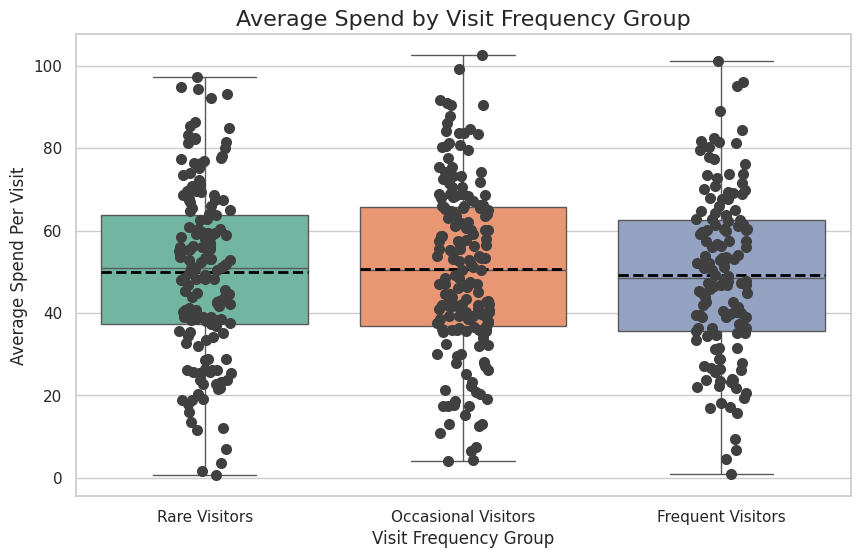

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Visit_Frequency_Group", y="Average_Spend_Per_Visit", palette="Set2", showmeans=True, meanline=True, 
            meanprops={"color": "black", "linewidth": 2})
sns.stripplot(data=df, x="Visit_Frequency_Group", y="Average_Spend_Per_Visit", color=".25", size=8, jitter=True)
plt.title("Average Spend by Visit Frequency Group", fontsize=16)
plt.xlabel("Visit Frequency Group")
plt.ylabel("Average Spend Per Visit")
plt.show()


# Analysis of the Plot: Average Spend by Visit Frequency Group

## Overview

The boxplot visualizes the distribution of average spend per visit across different **Visit Frequency Groups** (Rare Visitors, Occasional Visitors). The median spending is shown with a line.

## Key Insights

1. **Rare Visitors**:
   - The median spend is equal to other groups, around 50$ per visit.

2. **Occasional Visitors**:
   - The median spend is equal to other groups, around 50$ per visit.
   - There is no significant difference between the median spend and other groups.
   - the number of Occasional Visitors is the highest.
   - includes customers who spend maximum average per visit .

3. **Regular Visitors**:
   - The median spend is equal to other groups, around 50$ per visit.

**conclusion** :
there is no significant difference between  groups.

In [149]:
df.head()

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
0   56  Female                3        Haircut                    56.36   
1   69    Male                1      Treatment                    37.41   
2   46    Male                5  Hair Coloring                    53.90   
3   32  Female                4  Hair Coloring                    46.83   
4   60    Male               10        Haircut                    49.17   

   Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  \
0       741.17             Yes                   No               3   
1       300.87              No                   No               2   
2        16.39              No                  Yes               5   
3       528.59              No                  Yes               4   
4       138.68              No                  Yes               3   

    Age_Group Visit_Frequency_Group Customer_Value  
0  Middle Age         Rare Visitors           High  
1      Senior         Rare Visitors         Medium  
2  Middle Age   Occasional Visitors            Low  
3       Adult         Rare Visitors         Medium  
4  Middle Age     Frequent Visitors            Low

In [150]:
cat_df = df.select_dtypes(include=["object"])
cat_df

Gender   Service_Type Loyalty_Program Promotional_Response   Age_Group  \
0    Female        Haircut             Yes                   No  Middle Age   
1      Male      Treatment              No                   No      Senior   
2      Male  Hair Coloring              No                  Yes  Middle Age   
3    Female  Hair Coloring              No                  Yes       Adult   
4      Male        Haircut              No                  Yes  Middle Age   
..      ...            ...             ...                  ...         ...   
495    Male        Styling              No                   No      Senior   
496  Female        Haircut              No                   No       Adult   
497  Female        Haircut              No                  Yes  Middle Age   
498    Male        Haircut              No                  Yes      Senior   
499  Female  Hair Coloring              No                  Yes    Teenager   

    Visit_Frequency_Group Customer_Value  
0           Rare Visitors           High  
1           Rare Visitors         Medium  
2     Occasional Visitors            Low  
3           Rare Visitors         Medium  
4       Frequent Visitors            Low  
..                    ...            ...  
495   Occasional Visitors         Medium  
496   Occasional Visitors         Medium  
497         Rare Visitors         Medium  
498         Rare Visitors            Low  
499         Rare Visitors         Medium  

[484 rows x 7 columns]

In [151]:
encoded_df = df.copy()

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_df.columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

encoded_df

Age  Gender  Visit_Frequency  Service_Type  Average_Spend_Per_Visit  \
0     56       0                3             1                    56.36   
1     69       1                1             3                    37.41   
2     46       1                5             0                    53.90   
3     32       0                4             0                    46.83   
4     60       1               10             1                    49.17   
..   ...     ...              ...           ...                      ...   
495   65       1                7             2                    35.39   
496   42       0                5             1                    46.04   
497   57       0                3             1                    42.40   
498   62       1                3             1                    48.25   
499   18       0                4             0                    53.05   

     Total_Spend  Loyalty_Program  Promotional_Response  Feedback_Score  \
0         741.17                1                     0               3   
1         300.87                0                     0               2   
2          16.39                0                     1               5   
3         528.59                0                     1               4   
4         138.68                0                     1               3   
..           ...              ...                   ...             ...   
495       422.39                0                     0               5   
496       365.14                0                     0               3   
497       401.85                0                     1               1   
498       101.22                0                     1               3   
499       235.58                0                     1               4   

     Age_Group  Visit_Frequency_Group  Customer_Value  
0            1                      2               0  
1            2                      2               2  
2            1                      1               1  
3            0                      2               2  
4            1                      0               1  
..         ...                    ...             ...  
495          2                      1               2  
496          0                      1               2  
497          1                      2               2  
498          2                      2               1  
499          3                      2               2  

[484 rows x 12 columns]

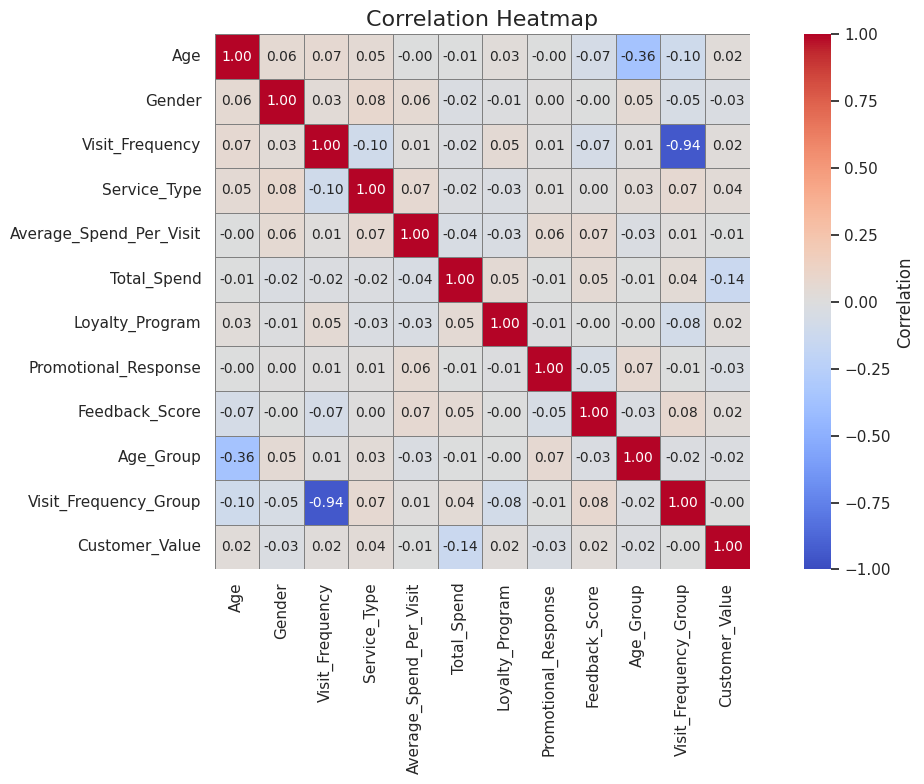

In [156]:

# Adjust figure size for better readability
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    encoded_df.corr(),  # Correlation matrix
    annot=True,          # Show correlation values
    cmap="coolwarm",     # Color map
    fmt=".2f",           # Format correlation values to 2 decimal places
    cbar_kws={'label': 'Correlation'},  # Label for the colorbar
    annot_kws={'size': 10},  # Font size for annotations
    linewidths=0.5,      # Add space between cells
    linecolor='gray',    # Gray lines between cells for better separation
    square=True,         # Make the heatmap square
    vmax=1,              # Set the max value for color scaling (this makes it symmetric)
    vmin=-1              # Set the min value for color scaling
)

# Title and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()  # Ensures everything fits within the plot area
plt.show()


# Analysis of Correlation Heatmap

## Overview

The heatmap visualizes the correlation between different features in the dataset.

## Key Insights

1. **Positive Correlations**:
   - there is no significant correlation between any two features because all values are close to 0. its seems that variables are independent or not related.
   - even its seems that variables have been generated and are not a actual values.

2. **Negative Correlations**:
   - there is no significant correlation between any two features because all values are close to 0. its seems that variables are independent or not related.
   - even its seems that variables have been generated and are not a actual values.


# Service Analysis in Depth 

## Service Popularity and Demand
- Objective: Determine which services are most commonly chosen by customers.
- Why Important: Helps identify which services are the backbone of your business and which ones may need more marketing or improvement.

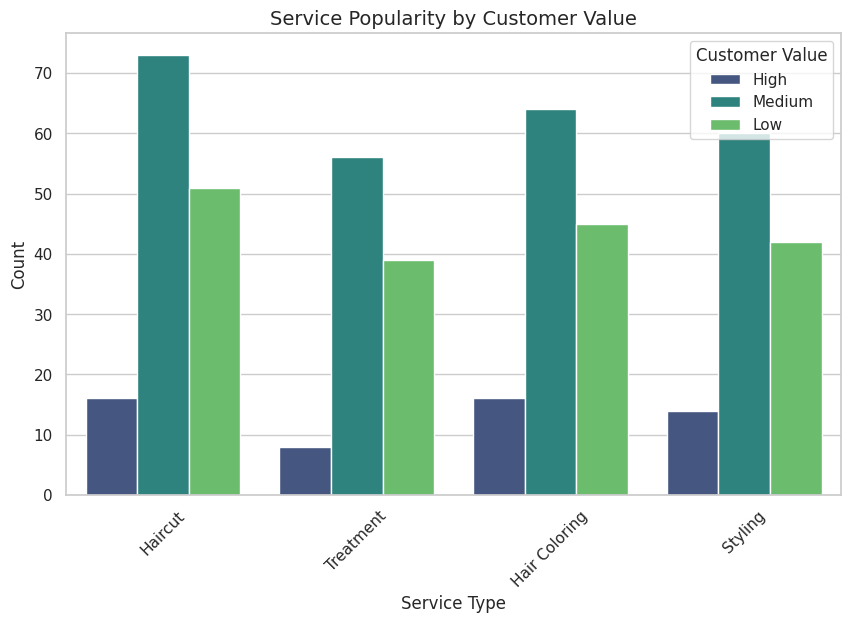

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Service_Type', hue='Customer_Value', palette='viridis')
plt.title('Service Popularity by Customer Value', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Customer Value')
plt.xticks(rotation=45)
plt.show()


# Overview

This bar chart visualizes the popularity of different salon services (Haircut, Treatment, Hair Coloring, and Styling) across three customer value segments: High, Medium, and Low. The height of each bar represents the count of customers within each value segment who chose that service.

## Key Insights

### Service Popularity
- **Haircut** is the most popular service across all customer value segments, followed by **Styling**.

### Customer Value and Service Preference
- Customers with **High value** tend to prefer **Haircuts** and **Hair Coloring**.
- Customers with **Low value** show a more balanced preference across all services.
- Customers with **Median value** show a slight preference for **Haircuts** and **Hair Coloring**.

### Service Segmentation
- **Haircut** is the most popular service for all customer value segments.
- **Haircoloring** is the second most popular service for High and Medium value customers.
- **Haircut** and **Haircoloring** are more popular among Low value customers.

## Recommendations

### Targeted Marketing
- For **High** and **Medium value** and **Low value** customers, focus marketing efforts on **Haircuts** and **Haircoloring**.

### Service Bundling
- Consider creating service bundles that combine popular services with complementary offerings to increase customer value and revenue.

### Customer Loyalty Programs
- Implement loyalty programs that reward customers based on their spending and service preferences.


---

Overall, this plot provides valuable insights into customer preferences and can be used to inform strategic decisions for the salon business.


## Average Customer Spending per Service Type
- Objective: Understand how much customers are spending on each type of service.
- Why Important: 
                1. To identify which service types generate the highest revenue on average.
                2. Services with higher Average_Spend_Per_Visit might have higher margins or demand premium pricing.
                      

Insights:

Determine which services generate the most revenue.

Find services that could benefit from price adjustments.

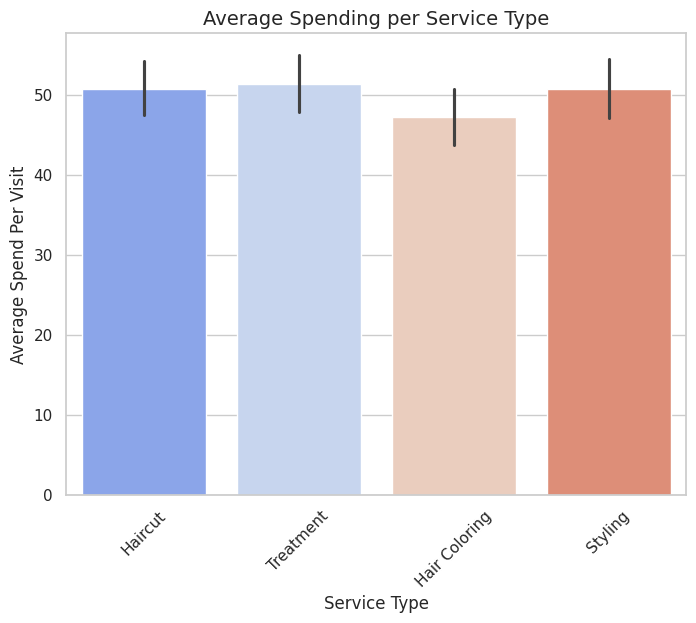

In [170]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Service_Type', y='Average_Spend_Per_Visit', palette='coolwarm')
plt.title('Average Spending per Service Type', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Average Spend Per Visit', fontsize=12)
plt.xticks(rotation=45)
plt.show()



# Overview

The bar chart titled **"Average Spending per Service Type"** visualizes the average spending per visit for four hair services: **Haircut, Treatment, Hair Coloring, and Styling**.  
- The **y-axis** represents the average spend per visit in dollars.  
- The **x-axis** lists the service types.  
- Each bar reflects the average spending for a specific service type, while **error bars** indicate the variability or uncertainty in the average spending.

## Key Insights

### Haircut
- Average spending per visit: **~$50**.
- Error bars indicate **small variability** in spending.

### Treatment
- Average spending per visit: **Slightly higher than $50**, similar to haircuts.
- Variability: **Small**, similar to haircuts.

### Hair Coloring
- Average spending per visit: **~$45**, lower than haircuts and treatments.
- Error bars indicate **small variability**.

### Styling
- Average spending per visit: **~$50**, comparable to haircuts and treatments.
- Variability: **Small**, similar to other services.

## Recommendations

### Focus on High-Spending Services
- Prioritize promoting **Haircuts, Treatments, and Styling**, as they have similar and higher average spending compared to Hair Coloring.

### Analyze Hair Coloring
- Investigate reasons for lower average spending on **Hair Coloring**.
- Consider introducing **premium hair coloring services** or offering **packages** to increase average spend.

### Customer Feedback
- Collect feedback to understand customer **preferences** and **willingness to spend** on different services.
- Use insights to tailor **service offerings** and **pricing strategies**.

### Promotional Offers
- Introduce **loyalty programs** or **promotional campaigns** for high-spending services like Haircuts, Treatments, and Styling to encourage repeat visits and boost retention.

---

By aligning service offerings with spending patterns, the salon can maximize its revenue while meeting customer preferences effectively.


# 3. Feedback Scores by Service Type

- A box plot reveals the distribution of feedback scores for each service type.
- Services with consistently low scores can be flagged for quality improvement initiatives.

- Why Important: 

                1. To evaluate customer satisfaction for each service type.
                
                2. Low feedback scores might indicate a need for service improvement


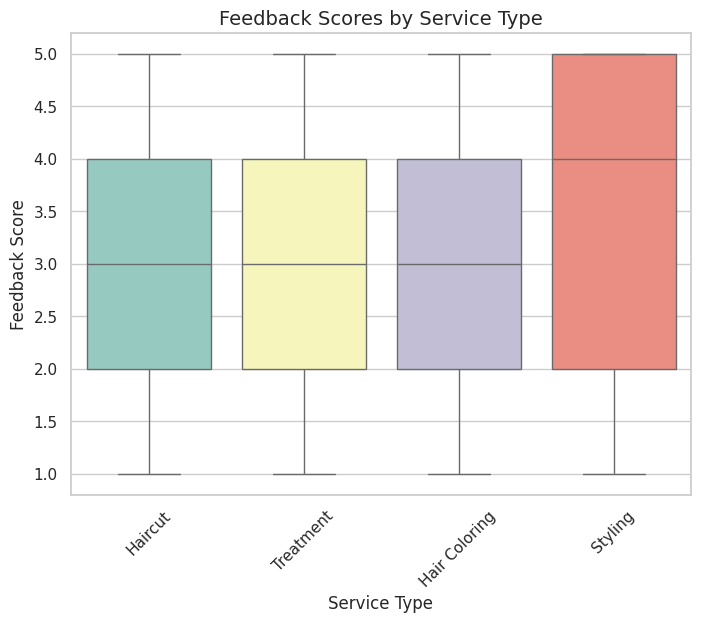

In [171]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Service_Type', y='Feedback_Score', palette='Set3')
plt.title('Feedback Scores by Service Type', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Feedback Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Overview:
The image is a box plot chart titled "Feedback Scores by Service Type." It displays the distribution of feedback scores for four different service types: Haircut, Treatment, Hair Coloring, and Styling. The y-axis represents the feedback score, ranging from 1.0 to 5.0, while the x-axis lists the service types.

## Key Insights:
1. **Haircut** ,**Treatment** ,**Hair Coloring** : The feedback scores for haircuts range from 1.0 to 5.0, with a median score around 3.0. The interquartile range spans from approximately 2.0 to 4.0, indicating that most feedback scores fall within this range.

2. **Styling**: Styling services stand out with a higher median feedback score of 4.0. The range of scores is still from 1.0 to 5.0, but the interquartile range is similar, indicating consistent higher satisfaction.

## Recommendations:
1. **Enhance Service Quality**: Focus on maintaining and improving the quality of styling services, as they have the highest median feedback score. Identify the factors contributing to their higher satisfaction and apply these best practices to other services.
2. **Improve Lower-Rated Services**: For haircuts, treatments, and hair coloring, analyze the feedback data to identify common issues or areas for improvement. Address these issues to increase overall customer satisfaction.



# Visit Frequency by Age Group
Why we plot this:

            1. To analyze how often customers from different Age_Groups visit the salon.

            2. Understanding customer visit patterns helps in tailoring loyalty programs and targeted promotions.


A box plot shows the variation in visit frequency across age groups.


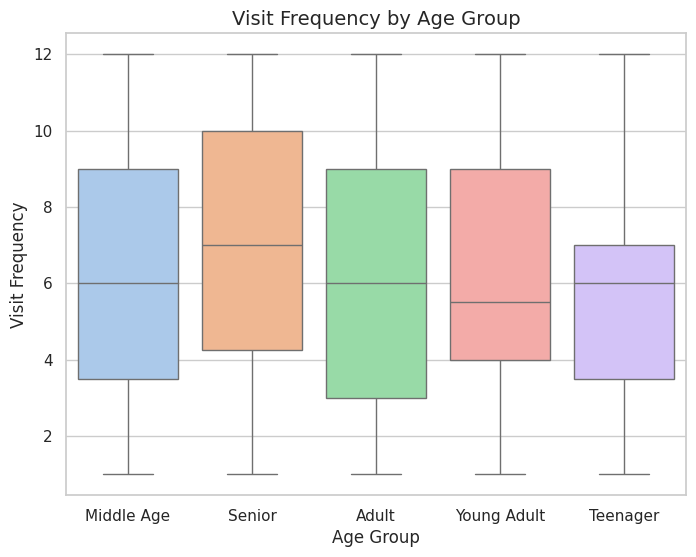

In [172]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age_Group', y='Visit_Frequency', palette='pastel')
plt.title('Visit Frequency by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Visit Frequency', fontsize=12)
plt.show()


# Overview:
The image is a box plot chart titled "Visit Frequency by Age Group." It displays the distribution of visit frequencies across five different age groups: Middle Age, Senior, Adult, Young Adult, and Teenager. The y-axis represents the visit frequency, while the x-axis lists the age groups. Each box plot shows the median, quartiles, and range of visit frequencies for each age group.

## Key Insights:
1. **Middle Age**: 
   - **Median Visit Frequency**: Approximately 6 visits.
   - **Interquartile Range (IQR)**: Spanning from around 3 to 9 visits.
   - **Whiskers**: Extend from about 1 to 12 visits.
2. **Senior**: 
   - **Median Visit Frequency**: Around 7 visits, the highest among all age groups.
   - **Interquartile Range (IQR)**: Spanning from approximately 5 to 10 visits.
   - **Whiskers**: Extend from about 1 to 12 visits.
3. **Adult**: 
   - **Median Visit Frequency**: About 6 visits.
   - **Interquartile Range (IQR)**: From approximately 3 to 9 visits.
   - **Whiskers**: Extend from about 1 to 12 visits.
4. **Young Adult**: 
   - **Median Visit Frequency**: Around 5 visits.
   - **Interquartile Range (IQR)**: From approximately 4 to 9 visits.
   - **Whiskers**: Extend from about 1 to 12 visits.
5. **Teenager**: 
   - **Median Visit Frequency**: Approximately 6 visits, the lowest among all age groups.
   - **Interquartile Range (IQR)**: From around 3 to 7 visits.
   - **Whiskers**: Extend from about 1 to 12 visits.

## Recommendations:
1. **Focus on Senior**: These age groups show a higher median visit frequency. Consider tailoring services, promotions, and loyalty programs to appeal to these groups to maintain and boost their engagement.
2. **Investigate Low Visit Frequency in Teenagers**: The lower median visit frequency for teenagers suggests they visit less frequently. Explore the reasons behind this trend, such as preferences or barriers to visiting, and develop targeted strategies to increase their engagement.
3. **Consistent Service Quality**: Ensure that service quality remains high across all age groups. Since there is variability within each group, consistent positive experiences can help maintain and potentially increase visit frequencies.
4. **Customized Marketing Strategies**: Develop marketing strategies that cater to the specific needs and preferences of each age group. For example, seniors might appreciate value-added services, while young adults might be attracted to trendy or innovative offerings.
5. **Feedback Collection**: Actively collect feedback from customers across all age groups to identify areas for improvement and tailor services to meet their expectations. Regularly analyzing this feedback will help keep the services aligned with customer needs.

# Loyalty Program Participation by Service Type
Why we plot this:

            1. To identify which services are most associated with loyalty program participation.

            2. Services tied to loyalty programs could help improve customer retention.

- A stacked bar chart shows how many customers enrolled in the loyalty program for each service type.

- This helps in identifying the services that can drive more loyalty program participation.

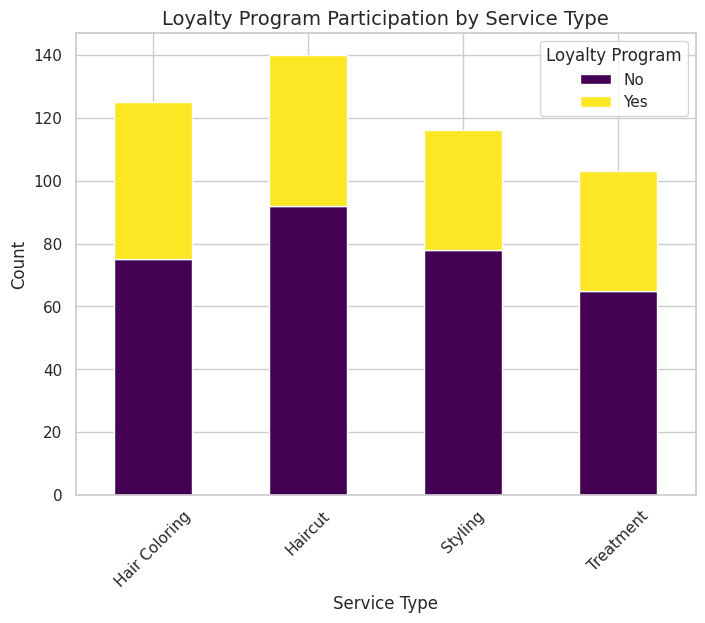

In [173]:
loyalty_service = df.groupby(['Service_Type', 'Loyalty_Program']).size().unstack()
loyalty_service.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Loyalty Program Participation by Service Type', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loyalty Program')
plt.xticks(rotation=45)
plt.show()


# Overview:
The image is a bar chart titled "Loyalty Program Participation by Service Type." It displays the count of participants in a loyalty program across four different service types: Hair Coloring, Haircut, Styling, and Treatment. The bars are divided into two segments, with the purple segment representing those who are not part of the loyalty program and the yellow segment representing those who are part of the loyalty program.

## Key Insights:
1. **Hair Coloring**:
   - **Total Count**: Approximately 120 participants.
   - **Loyalty Program Participation**: About 50 participants are part of the loyalty program, and 70 are not.
   - **Observations**: The split is even between participants in the loyalty program and those who are not, indicating a balanced level of engagement for this service type.

2. **Haircut**:
   - **Total Count**: Approximately 140 participants.
   - **Loyalty Program Participation**: Around 50 participants are part of the loyalty program, while 90 are not.
   - **Observations**: A lower number of participants in the loyalty program compared to those who are not, suggesting weaker loyalty program engagement for haircuts.

3. **Styling**:
   - **Total Count**: Approximately 120 participants.
   - **Loyalty Program Participation**: About 40 participants are part of the loyalty program, and 80 are not.
   - **Observations**: Lower participants in the loyalty program than those who are not, indicating a bad engagement levels for styling services.

4. **Treatment**:
   - **Total Count**: Approximately 100 participants.
   - **Loyalty Program Participation**: Around 35 participants are part of the loyalty program, and 65 are not.
   - **Observations**: A lower number of participants in the loyalty program compared to those who are not, indicating a weakness in engagement of treatment services.

## Recommendations:
1. **Leverage Successful Programs**: Focus on services like haircuts and treatments, which have higher loyalty program participation. Use these as models to improve loyalty program engagement for other services.


In [174]:
df.to_excel('hair_salon_data.xlsx', index=False)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('hair_salon_data.xlsx')

In [3]:
df

Age  Gender  Visit_Frequency   Service_Type  Average_Spend_Per_Visit  \
0     56  Female                3        Haircut                    56.36   
1     69    Male                1      Treatment                    37.41   
2     46    Male                5  Hair Coloring                    53.90   
3     32  Female                4  Hair Coloring                    46.83   
4     60    Male               10        Haircut                    49.17   
..   ...     ...              ...            ...                      ...   
479   65    Male                7        Styling                    35.39   
480   42  Female                5        Haircut                    46.04   
481   57  Female                3        Haircut                    42.40   
482   62    Male                3        Haircut                    48.25   
483   18  Female                4  Hair Coloring                    53.05   

     Total_Spend Loyalty_Program Promotional_Response  Feedback_Score  \
0         741.17             Yes                   No               3   
1         300.87              No                   No               2   
2          16.39              No                  Yes               5   
3         528.59              No                  Yes               4   
4         138.68              No                  Yes               3   
..           ...             ...                  ...             ...   
479       422.39              No                   No               5   
480       365.14              No                   No               3   
481       401.85              No                  Yes               1   
482       101.22              No                  Yes               3   
483       235.58              No                  Yes               4   

      Age_Group Visit_Frequency_Group Customer_Value  
0    Middle Age         Rare Visitors           High  
1        Senior         Rare Visitors         Medium  
2    Middle Age   Occasional Visitors            Low  
3         Adult         Rare Visitors         Medium  
4    Middle Age     Frequent Visitors            Low  
..          ...                   ...            ...  
479      Senior   Occasional Visitors         Medium  
480       Adult   Occasional Visitors         Medium  
481  Middle Age         Rare Visitors         Medium  
482      Senior         Rare Visitors            Low  
483    Teenager         Rare Visitors         Medium  

[484 rows x 12 columns]

# Promotional Response by Customer Value
Why we plot this:

- To evaluate how promotional offers are received by customers with different Customer_Value levels.

- High-value customers responding to promotions indicate a high return on investment.

Explanation:

        1. A stacked bar chart shows how different value customers respond to promotions.
        2. This insight helps refine promotional strategies for maximizing engagement and revenue.

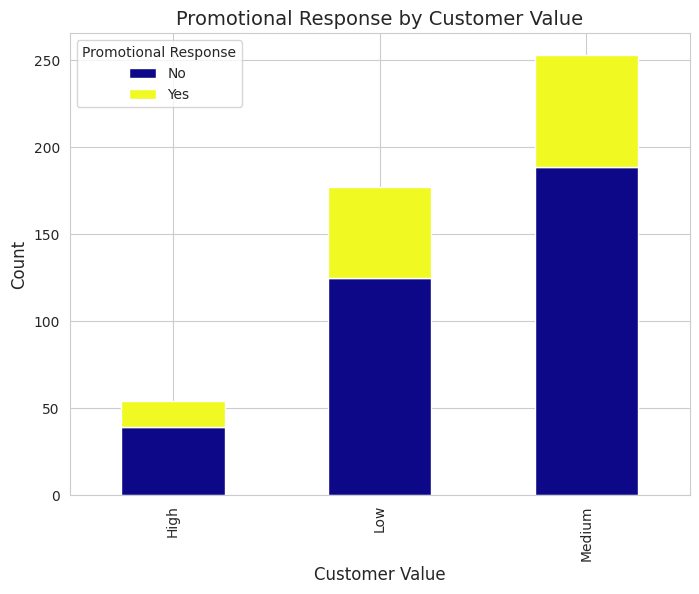

In [13]:
promo_response = df.groupby(['Customer_Value', 'Promotional_Response']).size().unstack()
promo_response.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='plasma')
plt.title('Promotional Response by Customer Value', fontsize=14)
plt.xlabel('Customer Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Promotional Response')
plt.show()


# Conclusion
The above plots offer a comprehensive visual understanding of your dataset:

- **Service Popularity by Customer Value** reveals which services attract your top customers.

- **Average Spending per Service Type** highlights high-revenue services to focus marketing efforts.

- **Feedback Scores by Service Type** identifies areas for improving customer satisfaction.

- **Visit Frequency by Age Group** uncovers patterns in customer behavior to tailor services.

- **Loyalty Program Participation by Service Type** shows opportunities for boosting retention.

- **Promotional Response by Customer Value** informs targeted promotional campaigns.

# Key Plots for Analyzing Loyalty Program Effectiveness


## Total Spending: Loyalty Program vs. Non-Loyalty Program

Goal:

To compare the total spending of customers enrolled in the loyalty program (Loyalty_Program) with those who are not.
This helps assess whether the program encourages higher spending.

Why We Plot This:

- A box plot shows the distribution of total spending for loyalty program participants versus non-participants.
- If loyalty program participants consistently spend more, this indicates the program's effectiveness in driving revenue.

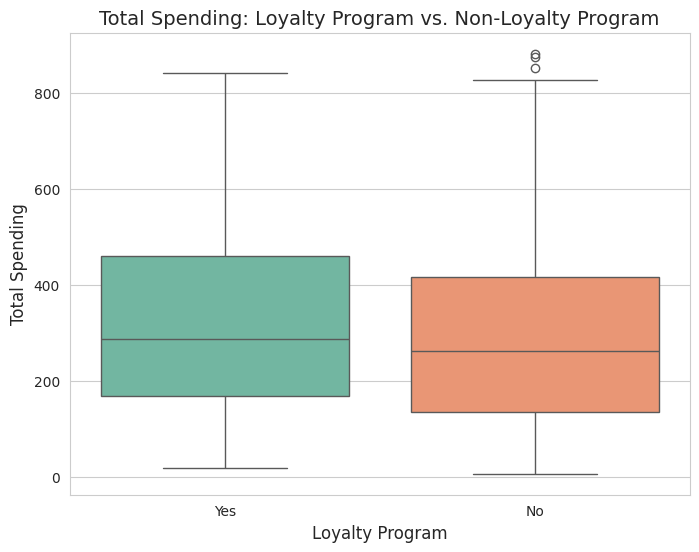

In [14]:


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Loyalty_Program', y='Total_Spend', palette='Set2')
plt.title('Total Spending: Loyalty Program vs. Non-Loyalty Program', fontsize=14)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.show()


# Overview:
The image is a box plot comparing total spending between customers who are part of a loyalty program ("Yes") and those who are not ("No"). The x-axis represents the loyalty program status, while the y-axis represents total spending.

## Key Insights:
1. **Loyalty Program Members ("Yes")**:
   - **Median Spending**: Higher median spending compared to non-members.
   - **Interquartile Range (IQR)**: Wider IQR, indicating greater variability in spending among loyalty program members.
   - **Outliers**: Some extreme high spenders are indicated by points above the upper whisker.

2. **Non-Members ("No")**:
   - **Median Spending**: Lower median spending compared to loyalty program members.
   - **Interquartile Range (IQR)**: Narrower IQR, suggesting less variability in spending.
   - **Outliers**: Few outliers, but less frequent and lower in total spending compared to loyalty program members.

## Recommendations:
1. **Promote Loyalty Program**: Given that loyalty program members have higher median spending, actively promote the benefits of joining the loyalty program to non-members. This could include advertising the higher savings or exclusive deals available to members.
2. **Target High Spenders**: For existing loyalty program members with high spending, introduce personalized offers to maintain their engagement. For example, exclusive discounts or early access to new services/products.
3. **Engage Non-Members**: Develop targeted campaigns to increase spending among non-members. Highlight the immediate benefits they would receive by joining the loyalty program, such as instant discounts or bonus points.
4. **Analyze Outliers**: Study the spending patterns of the outliers within the loyalty program to understand what drives their high spending. This can provide insights to further enhance loyalty program benefits or tailor specific campaigns.



## Visit Frequency: Loyalty Program vs. Non-Loyalty Program
Goal:

To evaluate whether the loyalty program encourages customers to visit more frequently.

Why We Plot This:

- Customers enrolled in the loyalty program should ideally visit more frequently than non-members.

- This analysis helps determine if the program increases customer retention and engagement.

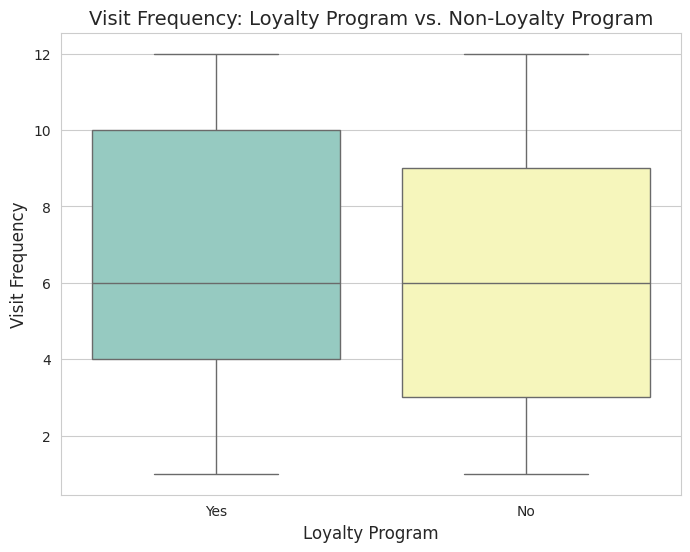

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Loyalty_Program', y='Visit_Frequency', palette='Set3')
plt.title('Visit Frequency: Loyalty Program vs. Non-Loyalty Program', fontsize=14)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Visit Frequency', fontsize=12)
plt.show()


# Overview:
The image is a box plot comparing the visit frequency of customers who are part of a loyalty program ("Yes") and those who are not ("No"). The x-axis represents the loyalty program status, and the y-axis represents visit frequency.

## Key Insights:
1. **Loyalty Program Members ("Yes")**:
   - **Median Visit Frequency**: 6 visits.
   - **Interquartile Range (IQR)**: From 4 to 10 visits, indicating a broader range of visit frequencies among members.
   - **Minimum and Maximum Visit Frequency**: Ranges from 1 to 12 visits, indicating the spread of customer visits within this group.

2. **Non-Members ("No")**:
   - **Median Visit Frequency**: 6 visits, same as loyalty program members.
   - **Interquartile Range (IQR)**: From 3 to 8 visits, indicating a narrower range of visit frequencies among non-members.
   - **Minimum and Maximum Visit Frequency**: Ranges from 1 to 12 visits, similar to the loyalty program members.

## Recommendations:
1. **Further Analysis of Loyalty Program**: Since the median visit frequency is the same for both members and non-members, further analysis is needed to understand the factors driving the variability among loyalty program members. Investigate why some members visit more frequently while others do not.
2. **Targeting Inconsistent Visit Frequencies**: Address the wide variability in visit frequencies among loyalty program members. Identify members with lower visit frequencies and explore ways to encourage more consistent visits.
3. **Understanding Member Behavior**: Examine the behavior of high-frequency visitors within the loyalty program. Understanding their motivations can help replicate these patterns in other members to increase their visit frequency.
4. **Customer Engagement**: Collect and analyze feedback from both groups to understand their needs and preferences. Use this information to make data-driven adjustments to improve the overall customer experience and visit frequency.

By focusing on these areas, businesses can better understand the impact of their loyalty programs and identify opportunities to enhance customer engagement and visit frequencies.

## Feedback Scores: Loyalty Program vs. Non-Loyalty Program
Goal:

To assess whether loyalty program participants give better feedback scores, indicating improved customer satisfaction.

Why We Plot This:

- Positive feedback scores from loyalty program members indicate higher satisfaction, which can drive word-of-mouth marketing and long-term loyalty.

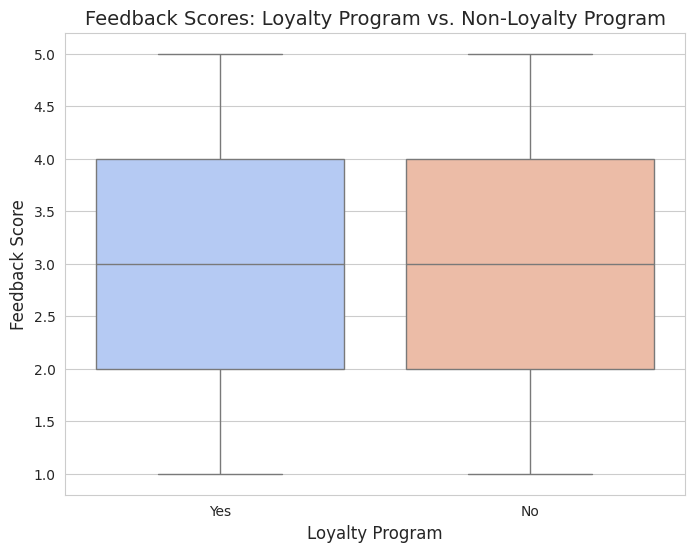

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Loyalty_Program', y='Feedback_Score', palette='coolwarm')
plt.title('Feedback Scores: Loyalty Program vs. Non-Loyalty Program', fontsize=14)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Feedback Score', fontsize=12)
plt.show()


Loyalty Program Participation by Customer Value

Goal:

To analyze how customer value (Customer_Value) correlates with loyalty program participation.

Why We Plot This:

- To understand if high-value customers are more likely to enroll in the loyalty program.
- This analysis helps tailor the program to attract more high-value customers.

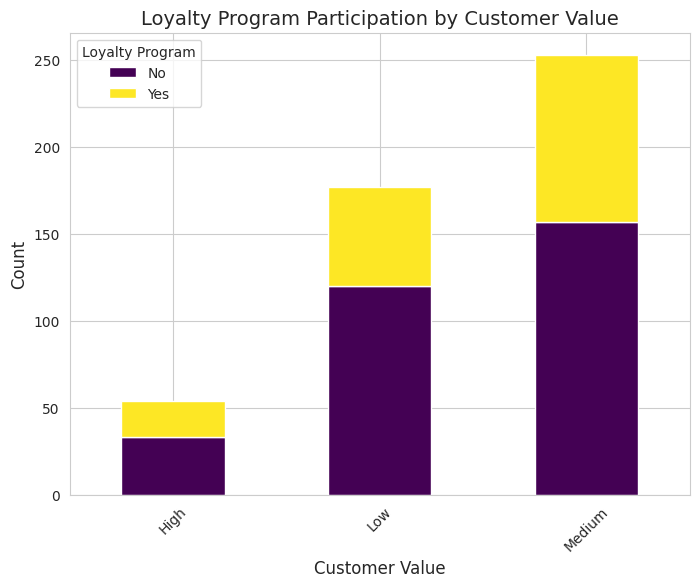

In [17]:
loyalty_value = df.groupby(['Customer_Value', 'Loyalty_Program']).size().unstack()
loyalty_value.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Loyalty Program Participation by Customer Value', fontsize=14)
plt.xlabel('Customer Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loyalty Program')
plt.xticks(rotation=45)
plt.show()


Impact of Loyalty Program on Promotional Response

Goal:

To evaluate whether loyalty program participants are more responsive to promotions compared to non-participants.


Why We Plot This:

- Understanding promotional response differences between loyalty program participants and non-participants helps refine marketing efforts and promotions.

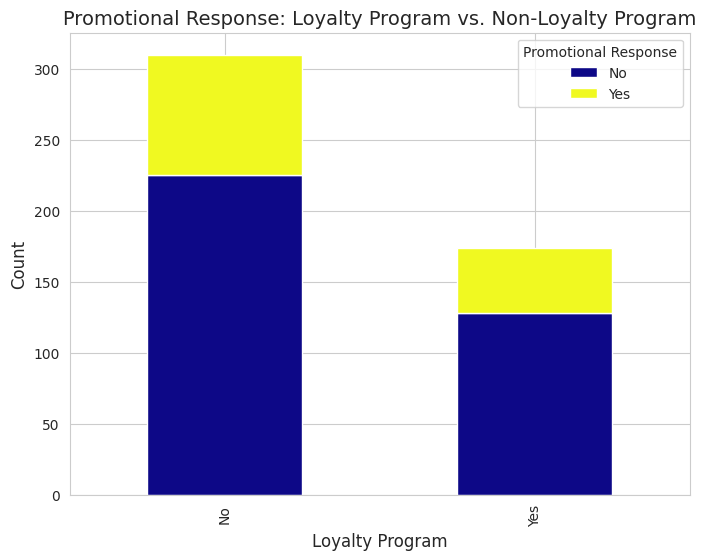

In [18]:
promo_loyalty = df.groupby(['Loyalty_Program', 'Promotional_Response']).size().unstack()
promo_loyalty.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='plasma')
plt.title('Promotional Response: Loyalty Program vs. Non-Loyalty Program', fontsize=14)
plt.xlabel('Loyalty Program', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Promotional Response')
plt.show()


 # Conclusion
The above plots provide a comprehensive picture of the loyalty program's effectiveness:

**Spending Analysis**: Box plots for Total_Spend and Visit_Frequency reveal whether the program encourages higher spending and frequent visits.

**Customer Satisfaction**: Feedback score comparisons help measure customer satisfaction among program participants.

**Customer Value Analysis**: Stacked bar charts highlight the distribution of loyalty program participation across customer value segments.

**Promotional Response**: Analyzing promotional response differences ensures that marketing campaigns are optimized for loyalty members.

# Feature Enginiering

##  RFM Analysis (Recency, Frequency, Monetary Value)
Assign scores to customers based on:

- Recency: How recently a customer visited.
- Frequency: How often they visit.
- Monetary: How much they spend.

In [19]:
df['Recency_Score'] = pd.qcut(df['Visit_Frequency'], 3, labels=[3, 2, 1])
df['Frequency_Score'] = pd.qcut(df['Visit_Frequency'], 3, labels=[1, 2, 3])
df['Monetary_Score'] = pd.qcut(df['Total_Spend'], 3, labels=[1, 2, 3])
df['RFM_Score'] = df['Recency_Score'].astype(int) + df['Frequency_Score'].astype(int) + df['Monetary_Score'].astype(int)


In [21]:
df.to_excel('hair_salon_data.xlsx', index=False)